# Projet Machine Learning - Notebook Python

---

Ce projet a pour but de s'initier au machine learning et de mettre en application les méthodes vues en cours et en TP. Il a été réalisé par Callen Balthazar, Chalet Ines, de Truchis de Varennes Paola et Misselis Emiri, élèves ingénieur.e.s en quatrième année du département de Génie Mathématique et Modélisation de l'INSA Toulouse.

Deux notebooks seront complétés afin de présenter les résultats de ce projet : l'un codé en Python et l'autre en R. Chacun des deux notebooks présentera l'analyse et le traitement des données ainsi que leur interprétation. Les deux notebooks seront structurés de manière similaire afin de suivre aisément l'avancement du projet. La structure générale des notebooks suivra l'ordre des questions présentées dans le sujet.

---

Le but du projet est de prédire la quantité d'émission de CO2 des pays à partir du jeu de données *Global Data on Sustainable Energy* acquis entre 2000 et 2020. Ce jeu de données comporte 3649 observations et 21 variables liées à la consommation énergétique et la géographie des pays. Il est issu du site du concours KAGGLE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Téléchargement des données

path=""
data=pd.read_csv("data.csv",sep=",",header=0)
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Analyse exploratoire des données

Cette première partie a pour but de prendre en main les données et de faire une première étude descriptive.

### 1. Affichage des données et transformation qualitative/quantitative

In [3]:
#On transforme nos données en DataFrame
data = pd.DataFrame(data)

#On transforme 'Year' en une variable qualitative
data['Year'] = data['Year'].astype('category')
# il faut aussi transformer Entity en variable qualitative non ?

#On transforme la variable 'Density\\n(P/Km2)' en variable numérique
data['Density\\n(P/Km2)'] = pd.to_numeric(data['Density\\n(P/Km2)'].str.replace(',', ''), errors='coerce')

print(data.dtypes)

Entity                                                                object
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

### 2. Analyse des valeurs manquantes

Nous avons précédemment vu que le jeu de données contenait des valeurs manquantes. Nous regardons ici quel est le taux de valeurs manquantes afin de voir comment appréhender ce problème.

In [4]:
#Calcul du taux de valeurs manquantes 

Val_Manquante = {}

for col in data.columns: 
    Val_Manquante[col] = data[col].isna().sum()/36.49

In [5]:
#suppression des variables contenant plus de 25% de NA

data=data.drop('Renewable-electricity-generating-capacity-per-capita', axis=1)
data=data.drop('Financial flows to developing countries (US $)', axis=1)
data=data.drop('Renewables (% equivalent primary energy)', axis=1)

### 3. Création du jeu de données

In [6]:
data = data.dropna() #suppression des individus contenant des valeurs manquantes
#data = data.reset_index(drop=True) #réinitialisation de l'index des lignes
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.939110,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.939110,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,29.50,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38.0,390757.0,-19.015438,29.154857
3644,Zimbabwe,2016,42.561730,29.80,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.80,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.90,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857


In [7]:
data.describe() # equivalent d'un summary sur R

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000
mean,76.584630,62.170084,35.802071,76.693556,15.337019,26.603375,39.629403,26082.456843,5.418111,1.688182e+05,3.895326,12577.050921,228.214784,6.581668e+05,18.140402,12.970486
std,31.510371,39.238548,30.024000,374.419806,78.776075,107.640273,34.454884,37097.457254,3.577415,8.180202e+05,4.645613,18730.476190,742.358140,1.705048e+06,24.924975,65.478645
min,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,53.237811,22.075000,9.187500,0.290000,0.000000,0.090000,6.091074,2779.966525,3.280000,2.187500e+03,1.770575,1209.802655,31.000000,2.974300e+04,1.650801,-10.940835
50%,97.000000,81.550000,28.790000,2.995000,0.000000,1.680000,35.009718,11922.761000,4.400000,1.042500e+04,3.788166,4168.110171,83.000000,1.319570e+05,17.060816,18.643501
75%,100.000000,100.000000,60.667500,25.787500,0.000000,10.102500,66.879318,31838.556000,6.140000,5.814500e+04,5.957490,14828.344425,206.000000,4.881000e+05,39.399872,43.679291
max,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


In [8]:
print("La taille des données est" , data.shape)

La taille des données est (2868, 18)


#### Renommage des données

Nous décidons de renommer les variables car leurs noms sont très longs. Nous leurs attribuons des noms plus courts (ce qui mieux pour divers affichages que nous verrons par la suites) qui permettent de garder le sens de chacune.

In [9]:
colonms = ["Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
           "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
            "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude"]

data.rename(columns=dict(zip(data.columns, colonms)), inplace=True)
data.head()

,Entity,Year,Access_to_elec,Access_to_fuels,Renewable_energy_share,Elec_from_fossils,Elec_from_nuclear,Elec_from_renewables,Low_carbon_elec,Prim_energy_cons,Energy_intensity_level,Value_CO2,Gdp_growth,Gdp_capita,Density,Land_area,Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


**Interprétation :** 

On a bien 2868 lignes (= individus) et nos noms de variables ont bien été modifiés. On a un jeu de données sans valeurs manquantes. Nous pouvons désormais analyser ces données.

### 3. Analyse descriptive unidimentionnelle 

Nous commençons par une analyse descriptive unidimensionnelles. Nous affichons les histogrammes des variables. Nous verrons s'il est nécessaire de standardiser et/ou appliquer des transformations aux variables. Afin de les avoir en tête, nous précisons les unités de chaque variables.

**Unités des variables :**

% : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

TWh : Electricity (6, 7, 8)

KWh : Primary energy consumption (10) ;

Mj : Energy intensity level (11) ;

Metrics tones per capita : Value CO2 (12) ;

PIB : GDP per capita (14)

P/Km² : Density (15)

Km² : Land area (16)

° : Latitude (17) ; Longitude (18)

#### Etude des variables quantitatives

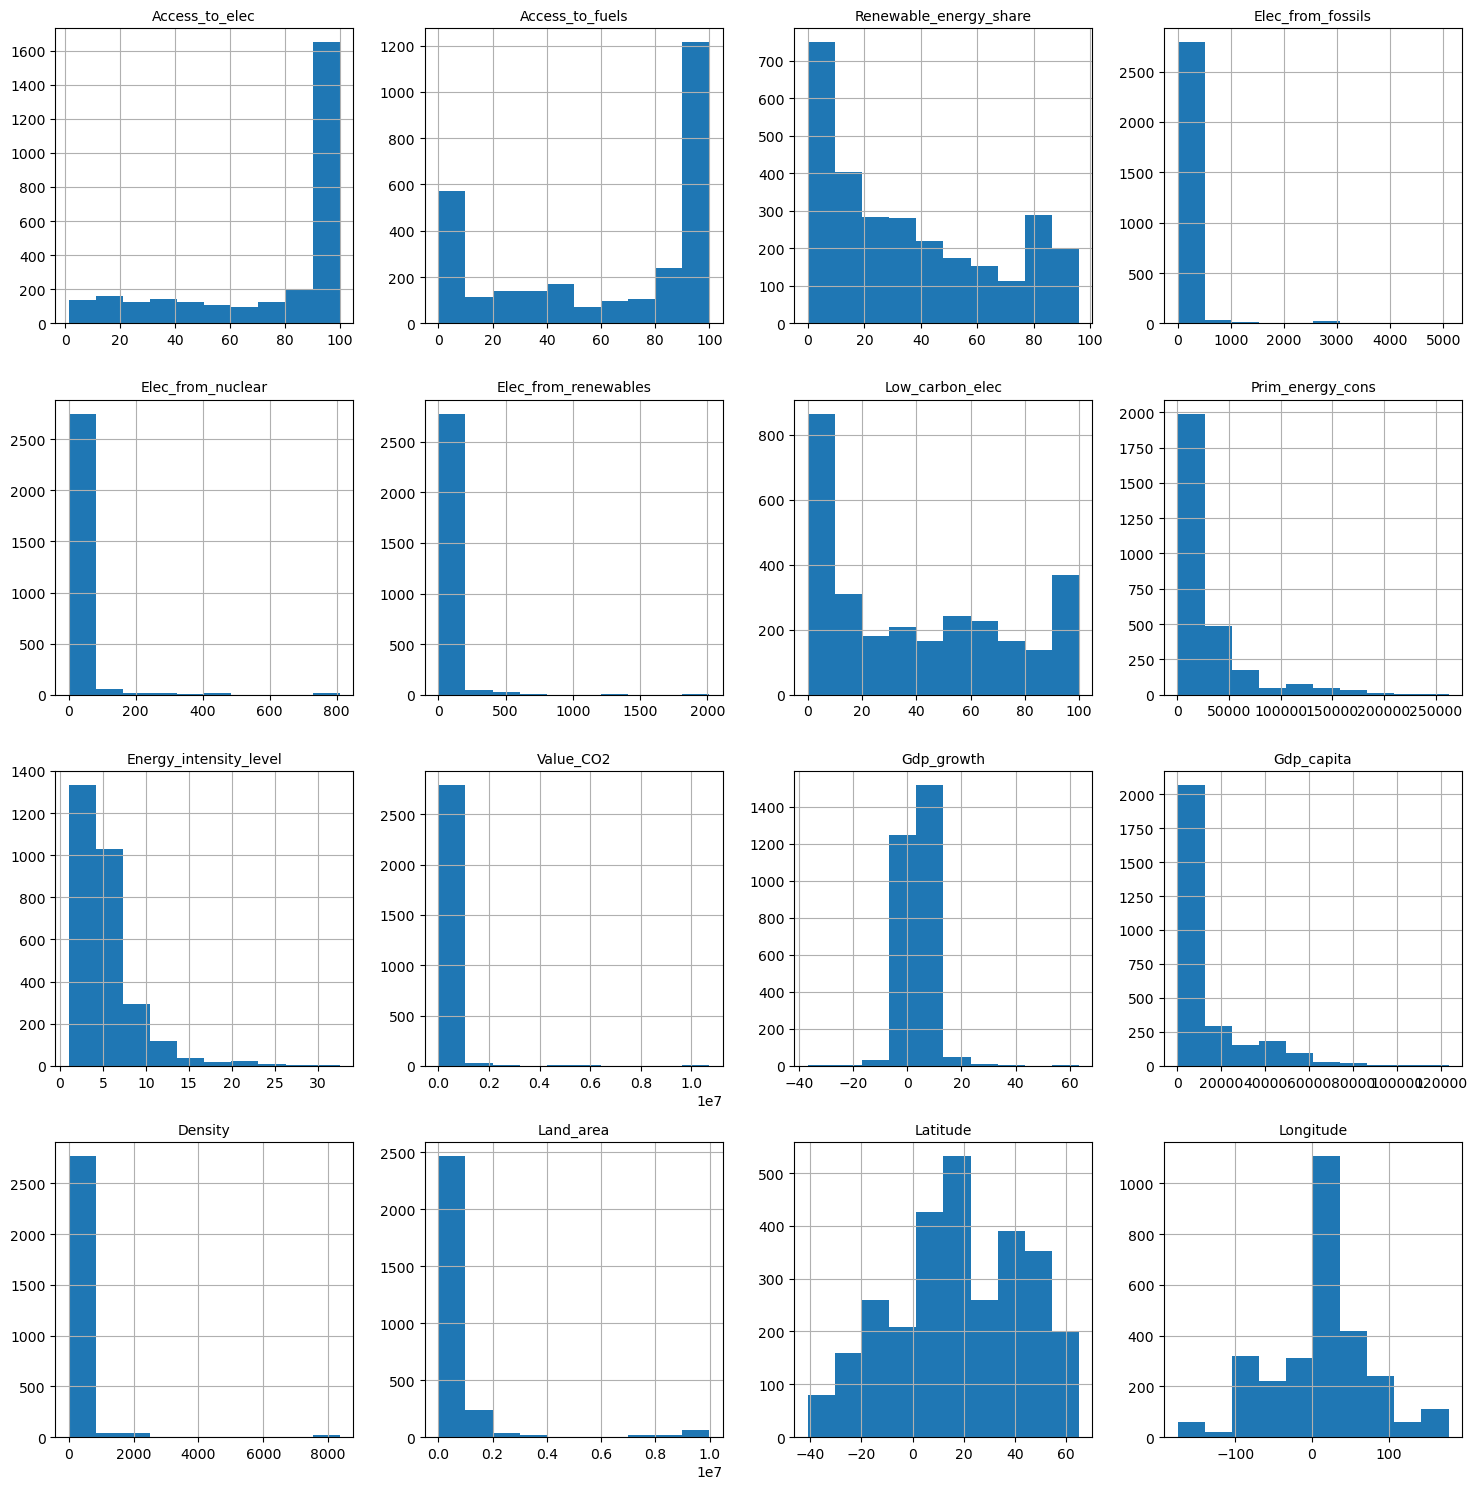

In [10]:
fig ,axs = plt.subplots(4,4, figsize=(15,15)) 

col = data.columns # noms des colonnes
axs = axs.flatten()

for i in range(len(col)-2):
    data[col[i + 2]].hist(ax=axs[i], bins = 10)
    axs[i].set_title(col[i + 2], fontsize=10)

plt.tight_layout()
plt.show()

**Interprétations:**

D'après les histogrammes, on peut voir que certaines variables ont une grande variance et ne sont pas également réparties ni centrées. Afin de mieux les interpréter et proposer un meilleur modèle de prédiction, nous allons les ajuster soit par une transformation logarithmique soit par une racine carrée.

On effectue une transformation sur les variables suivantes :

- Electricity from fossil fuels (TWh)
- Electricity from nuclear (TWh)
- Electricity from renewables (TWh)
- Primary energy consumption per capita (kWh/person)
- Energy intensity level of primary energy
- Value_co2_emissions_kt_by_country
- gdp_per_capita
- Density\n(P/Km2)
- Land_Area

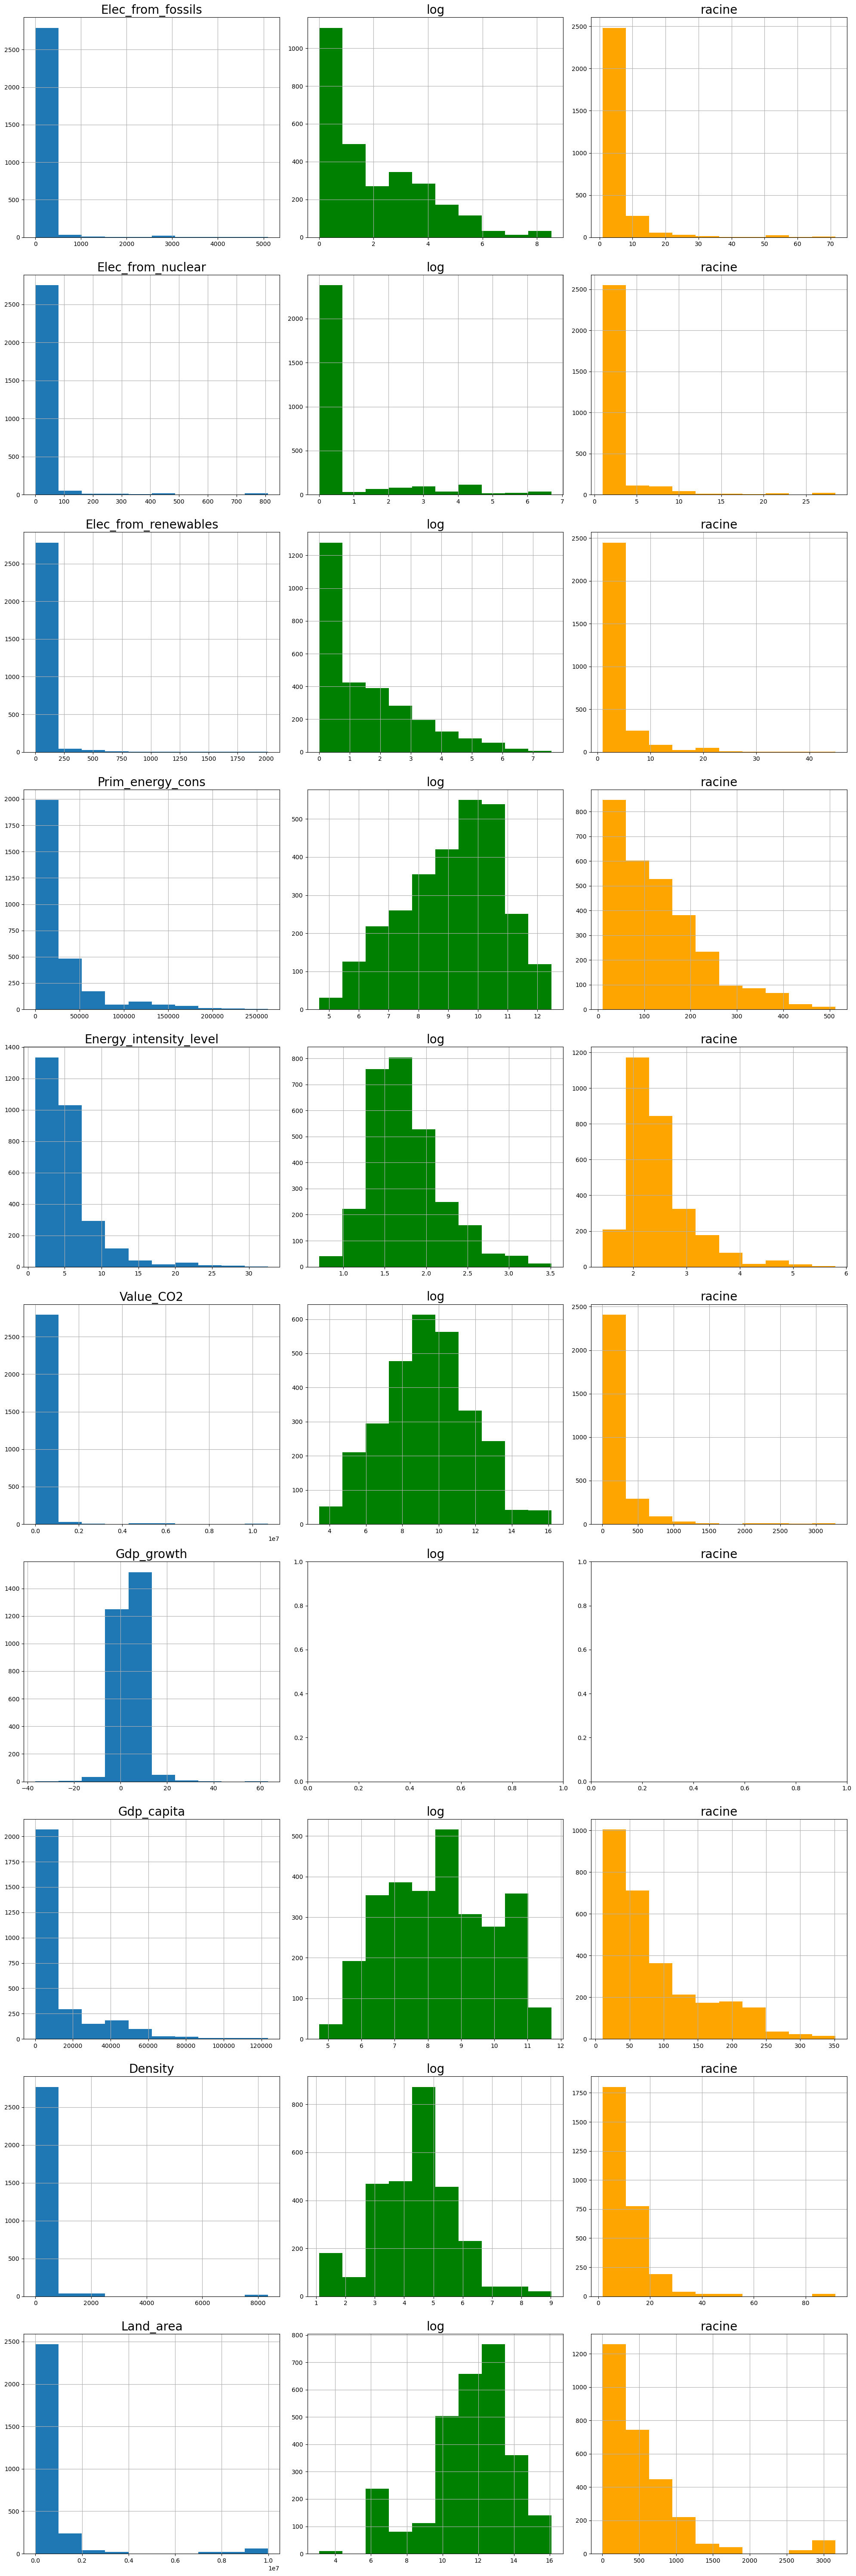

['Elec_from_fossils', 'Elec_from_nuclear', 'Elec_from_renewables', 'Prim_energy_cons', 'Energy_intensity_level', 'Value_CO2', 'Gdp_growth', 'Gdp_capita', 'Density', 'Land_area']


In [11]:
from math import sqrt, log

list_col = list(data.columns)

list_col_a_recentrer =  list_col[5:8] + list_col[9:16] 

fig ,axs = plt.subplots(len(list_col_a_recentrer),3, figsize=(20,60))


for i,col in enumerate(list_col_a_recentrer):  
    
    data[col].hist(ax=axs[i][0], bins = 10)
    
    if (data[col] >= 0).all():  # Vérifie si toutes les valeurs sont positives
        data[col].map(lambda x: np.log(x+1)).hist(ax=axs[i][1], bins = 10, color='green')
        data[col].map(lambda x: np.sqrt(x+1)).hist(ax=axs[i][2], bins = 10, color='orange')


    axs[i][0].set_title(col, fontsize=20)
    axs[i][1].set_title('log', fontsize=20)
    axs[i][2].set_title('racine', fontsize=20)


plt.tight_layout()
plt.show()

print(list_col_a_recentrer)


**Interprétation :**

Il semble plus interressant de prendre la transformation log qui permet de bien recentrer nos données. Nous les nommons en ajoutant un L_ au début de leur nom. Ainsi, la variable Land_area devient par exemple L_Land_area. On continuera la suite de l'analyse avec ces modifications. 

In [12]:
data_centre=data # création d'un nouveau tableau avec les valeurs recentrées

list_col = list(data.columns)
list_col_quanti = list_col[2:]
list_var_a_recentrer =  list_col[5:8] + list_col[9:12] + list_col[13:15] # col_r est une liste constituée du nom des variables à recentrer 

for col in list_var_a_recentrer:
    data_centre[col] = data[col].map(lambda x: np.log(x+1))
    data_centre = data_centre.rename(columns={col : 'L_' + col })


data_centre.head()
data_centre.columns.tolist()

['Entity',
 'Year',
 'Access_to_elec',
 'Access_to_fuels',
 'Renewable_energy_share',
 'L_Elec_from_fossils',
 'L_Elec_from_nuclear',
 'L_Elec_from_renewables',
 'Low_carbon_elec',
 'L_Prim_energy_cons',
 'L_Energy_intensity_level',
 'L_Value_CO2',
 'Gdp_growth',
 'L_Gdp_capita',
 'L_Density',
 'Land_area',
 'Latitude',
 'Longitude']

#### Etude des variables qualitatives

Comme nous avons enlevé les lignes contenant des données manquantes, certains pays ont moins d'années de relevé que d'autres. Il est important de prendre cela en compte dans l'interprétation de nos résultats.



In [15]:
#Nombre d'années de relevé par Pays 

Pays_valeurs = data.Entity.value_counts()
print(Pays_valeurs)
print('')

Entity
Lesotho            20
North Macedonia    20
Nepal              20
Netherlands        20
New Zealand        20
                   ..
Eritrea            12
Nauru              10
Djibouti            6
Somalia             6
South Sudan         3
Name: count, Length: 148, dtype: int64



Etant donné qu'on a enlevé des lignes qui avaient des valeurs manquantes, il sera important de prendre en compte que certains pays ont des relevés sur moins d'années. 

#### 5. Grande hétérogéneite de CO2

In [16]:
#On créer un tableau avec la moyenne pour chaque pays de l'emission en CO2
# on reprend data car on veut Value_CO2 sans le log
data_np = data.to_numpy()
Moy_Pays_CO2 = []
ind=0
Moy_Pays_CO2.append(data_np[0][11])
Pays = []
Pays.append(data_np[0][0])

for i in range(data_np.shape[0] -1) : 
    if data_np[i+1][0]== data_np[i][0] : 
        Moy_Pays_CO2[ind]+= data_np[i+1][11]
    else : 
        Moy_Pays_CO2[ind] = Moy_Pays_CO2[ind]/Pays_valeurs[data_np[i][0]] #moyenne de la somme de CO2 produite sur les années de prélèvement 
        Moy_Pays_CO2.append(data_np[i+1][11])
        Pays.append(data_np[i+1][0])
        ind+=1


{'whiskers': [<matplotlib.lines.Line2D at 0x13274cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x13274d2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x131d09e10>],
 'medians': [<matplotlib.lines.Line2D at 0x13274e6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13274df10>],
 'means': []}

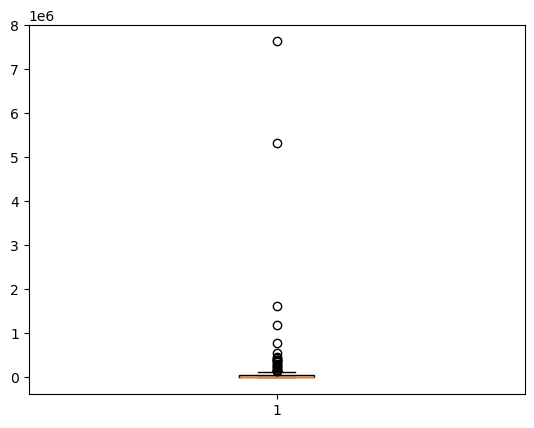

In [17]:
#Affichage de la valeur CO2 
plt.boxplot(Moy_Pays_CO2)

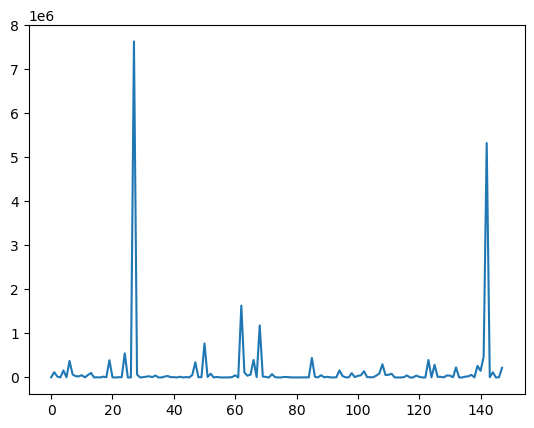

In [18]:
plt.plot(Moy_Pays_CO2)

**Interprétation:**

Le boxplot présente de nombreux outliers traduisant une hétérogénéité importante de la variable CO2. Ces outliers ne sont présent que d'un côté du boxplot (au dessus) ce qui traduit une forte asymétrie des valeurs prises par cette variable.

On retrouve le même résultat avec le barplot, celui-ci présente des pics à plus de 10e7 alors que les autres valeurs sont autour de 0.

Les outliers ont des valeurs de CO2 bien plus grandes. Maintenant, nous allons regarder quels sont les pays qui émettent le plus de CO2.

In [19]:
#CO2 pour chaque pays 
CO2_Pays = dict(zip(Pays, Moy_Pays_CO2))
CO2_Pays_trie = dict(sorted(CO2_Pays.items(), key=lambda item: item[1], reverse=True))
print('Les 5 pays produisant le plus de CO2 en cummulé sont :')

for Pays, Moy_Pays_CO2 in list(CO2_Pays_trie.items())[:5]:
    print(f"{Pays}: {Moy_Pays_CO2} ")
#CO2_trie = np.sort(CO2)[::-1]


Les 5 pays produisant le plus de CO2 en cummulé sont :
China: 7636642.46335 
United States: 5329538.5342 
India: 1633978.99966 
Japan: 1183734.48525 
Germany: 773644.502685 


**Interprétation :**

En faisant une moyenne de la consommation de CO2 (en metric tones per capita) des différents pays sur les années observées, on observe que les pays les plus polluants sont :

La Chine
Les Etats-Unis
L'Inde
Le Japon
L'Allemagne

Nous allons maintenant afficher les pays les plus producteurs de CO2 et les pays les moins producteur sur la carte du monde.

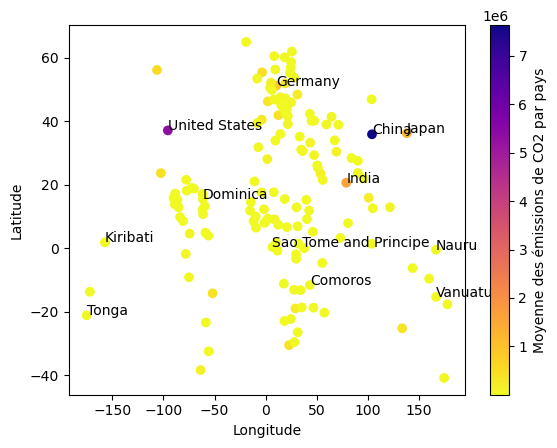

In [141]:
import matplotlib.cm as cm
# print(list(CO2_Pays_trie.values()))
data_CO2_2D = {'Pays':list(CO2_Pays_trie.keys()) ,
        'Moy_Pays_CO2': list(CO2_Pays_trie.values())}

data_CO2_2D = pd.DataFrame(data_CO2_2D)
for Pays in list(CO2_Pays_trie.keys()):
    index = data_CO2_2D.index[data_CO2_2D["Pays"] == Pays]
    data_CO2_2D.loc[index,"Longitude"]=data_centre[data_centre["Entity"] == Pays]["Longitude"].iloc[0]
    data_CO2_2D.loc[index,"Latitude"]=data_centre[data_centre["Entity"] == Pays]["Latitude"].iloc[0]

# print(data_centre[data_centre["Entity"] == "China"]["Longitude"].iloc[0])
# print(data_CO2_2D)

plt.scatter(data_CO2_2D.Longitude, data_CO2_2D.Latitude, c=data_CO2_2D["Moy_Pays_CO2"], cmap=cm.plasma_r)

# Ajouter des étiquettes pour chaque pays
for x, y, pays, moyenne_CO2 in zip(data_CO2_2D.Longitude, data_CO2_2D.Latitude, data_CO2_2D.Pays, data_CO2_2D["Moy_Pays_CO2"]):
    if moyenne_CO2 > 6e+05:
        plt.text(x, y, pays)
    if moyenne_CO2 < 2e+02 :
        plt.text(x, y, pays)

# Ajouter une barre de couleur
plt.colorbar(label='Moyenne des émissions de CO2 par pays')

# Ajouter des labels d'axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher le graphique
plt.show()

**Interprétations:**

En affichant les pays selon leurs émissions de CO2 on peut remarquer que les pays qui émettent le plus se trouvent dans l'hémisphère Nord. De même, ceux qui consomment le moins ont se situent dans l'hémisphère Sud. On peut donc se demander si la latitude d'un pays pourrait caractériser son taux d'émissions de CO2.

### 6. Analyse descriptive multidimentionnelle 

Nous regardons comment les variables intéragissent entre elles, si elles sont corrélées ou non.

On effectue cette analyse sur le jeu de données centrée (ie avec le jeux contenant les variables que l'on a décidé de transformer par un log).

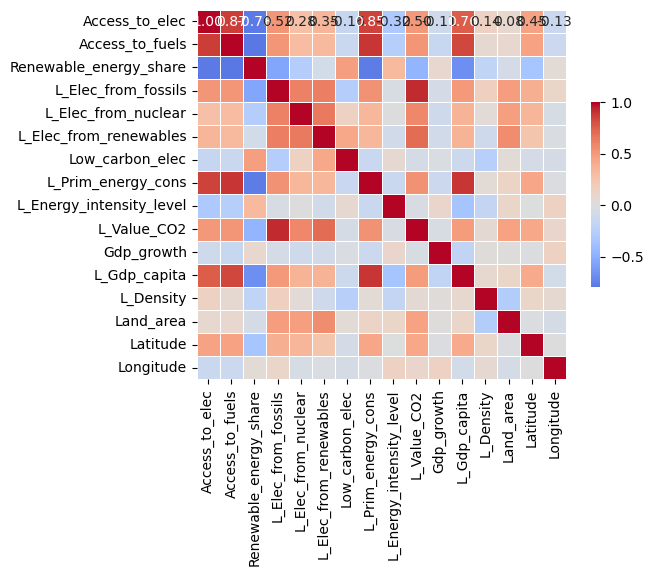

In [20]:
import seaborn as sns
# Calculer la matrice de corrélation
data_corr = data_centre[["Access_to_elec","Access_to_fuels","Renewable_energy_share","L_Elec_from_fossils","L_Elec_from_nuclear","L_Elec_from_renewables","Low_carbon_elec","L_Prim_energy_cons","L_Energy_intensity_level","L_Value_CO2","Gdp_growth","L_Gdp_capita","L_Density","Land_area","Latitude","Longitude"]]

corr_matrix = data_corr.corr()

# Tracer la heatmap de corrélation avec des ellipses de confiance
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=None, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Afficher le graphique
plt.show()

**Interprétation :**

D'après le graphe des corrélations, on peut remarquer des corrélations positives :

- Fortes entre : Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita : les pays ayant accès à l'electricité ont aussi accès au fuel..
- Plus faibles : L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables : plus les pays produisent de l'electricité par les énergies fossils, plus ils produisent par les énergies nucleaires et renouvelable.

On peut aussi observer des corrélations négatives entre :

- Fortes entre : Renewable_energy_share et Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita: si l'accès à l'électricité et au fuel augmente, la part des énergies renouvelables diminue.
- Plus faibles : L_Land_area et L_Density : si la taille du pays augmente sa densité baisse.

Concernant la variable C02 :

- Elle est corrélée positivement avec les trois variables élec, avec les variables Acess_to_elec et Acess_to_fuels. Il est cohérent de penser que si l'accès et la production d'énergies augmentent la production de CO2 augmentera aussi. Elle d'autant plus corrélée avec L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables. En effet si la production d'éléctricité augmente il est logique de penser que le rejet de CO2 va augmenter également.

- Il semble exister des corrélations avec la latitude mais pas spécialement avec la longitude : il semble que le critère sur la position Nord/Sud du pays ait un lien avec sa production de CO2. Un pays plus au Nord aurait tendance à produire plus de CO2, cela confirme l'hypothèse proposée lors de l'affichage sur la carte du monde.

- Enfin il semblerait que plus le pays est grand plus la production de CO2 sera importante. (corrélation positive avec L_land_Area).

La longitude et le Gdp growth ne semblent pas être corrélées aux autres variables.

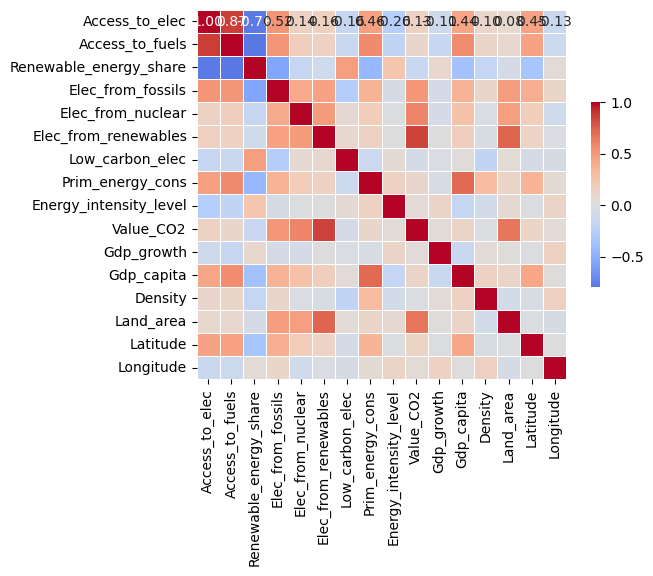

In [21]:
import seaborn as sns
# Calculer la matrice de corrélation
data_corr = data[["Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils","Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level","Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude"]]

corr_matrix = data_corr.corr()

# Tracer la heatmap de corrélation avec des ellipses de confiance
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=None, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Afficher le graphique
plt.show()

**Interprétation :**

Il semblerait que les corrélations soient similaires mais moins importantes (de même signe mais moins intense). Ce résultat est satisfaisant, cela montre que nous ne modifions pas les informations, et notamment les liens entre les variables, avec les transformations effectuées.

### 7. Analyse en composantes principales 

On effectue ici une ACP dans un double objectif :

- Exploratoire : l'ACP, peut nous permettre de mieux comprendre et étudier le jeu de données.
- Réduction de dimension : l'ACP peut nous permettre de réduire la dimension de notre jeu de données en créant des métavariables portant une part importante de la variabilité du jeu de données.

Comme précédemment, on effectue l'ACP sur le jeu de données avec les variables recentrées. On considère la variable à prédire (value_CO2) comme une variable quantitative supplémentaire.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix

In [142]:
data_scaled=scale(data_centre[data_centre.columns[2:18]])

new_data = np.delete(data_scaled,9,axis=1)

acp = PCA()

data_acp = acp.fit_transform(new_data)

data_acp = np.hstack((data_acp, data_scaled[:, 9][:, np.newaxis]))

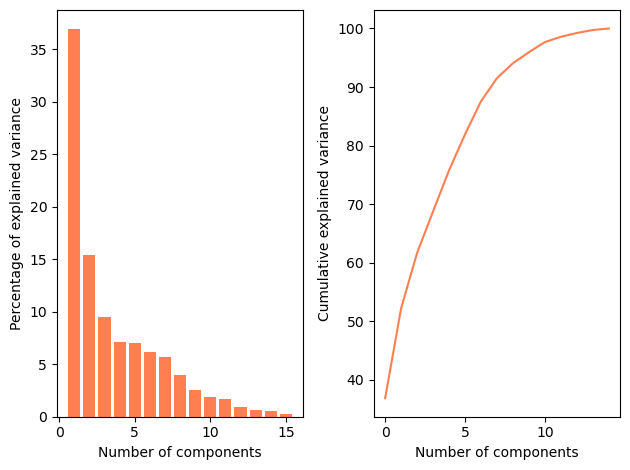

Variance expliquée par les 7 premières composentes: 87.57


In [25]:
explained_variance_ratio = 100*acp.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = 15
x = np.arange(1, n_bars + 1)
plt.bar(x, explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

plt.tight_layout()
plt.show()
print("Variance expliquée par les 7 premières composentes:", round(sum([explained_variance_ratio[i] for i in range(7)]),2))

**Interprétation :**

On choisit de garder 7 composantes principales afin d'expliquer plus de 85% de la variance du jeu de données.

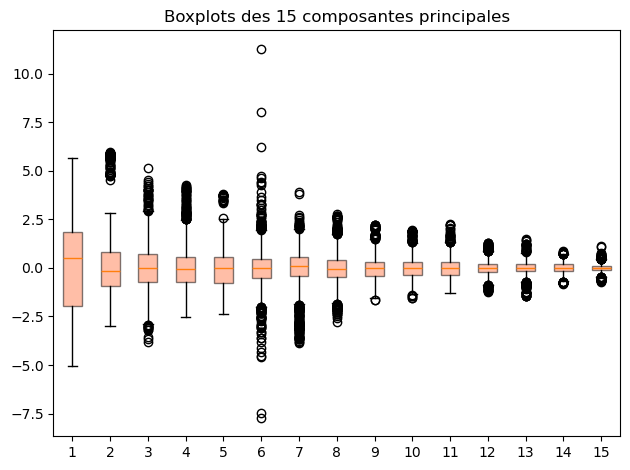

In [26]:
box = plt.boxplot(data_acp[:,:15], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Boxplots des 15 composantes principales")
plt.tight_layout()
plt.show()

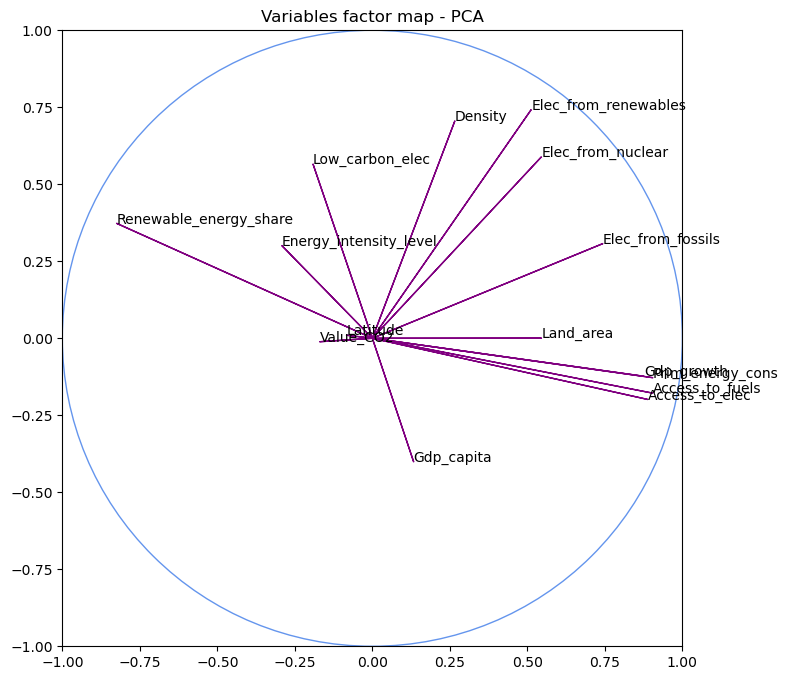

In [27]:
coord1 = acp.components_[0] * np.sqrt(acp.explained_variance_[0])
coord2 = acp.components_[1] * np.sqrt(acp.explained_variance_[1])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data.columns[2:]):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.show()

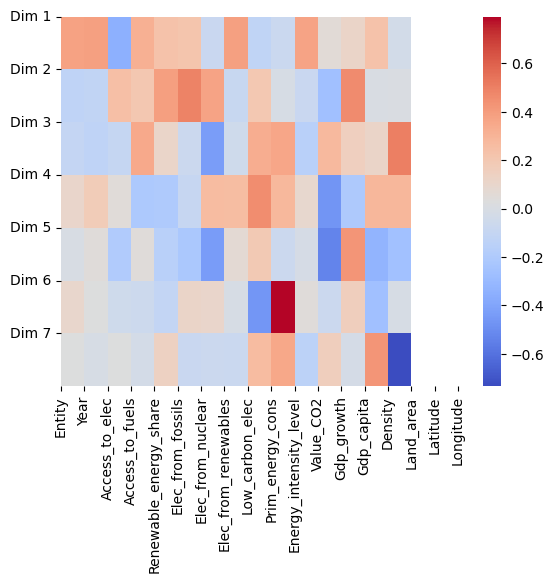

In [28]:
import seaborn as sns

heatmap = sns.heatmap(acp.components_[:7], annot=False, cmap='coolwarm')
plt.yticks(ticks=range(7), labels=['Dim {}'.format(i+1) for i in range(7)], rotation=0)
plt.xticks(ticks=range(len(data.columns)), labels=data.columns, rotation=90)
plt.show()

**Interprétation :**

- La dimension 1 semble bien expliquer Access_to_elec, Access_to_fuels,Prim_energy_cons et Gdp_capita . Au contraire elle est négativement corélée avec Renawable_energy_share et Energy_density_level.
- La dimension 2 explique très bien Land Area. Elle est aussi corrélée positivement avec toutes les sources d'électricité.

La valeur de CO2 est corrélée positivement avec les dimensions 1 et 2. La dimension 1 semble évoluer avec des caractéristiques impliquant une augmentation de la production de CO2 : l'accès à l'électricité, la production d'energies et les pays au Nord de l'équateur. La dimension 2 semble différencier la production d'énergies des autres variables.

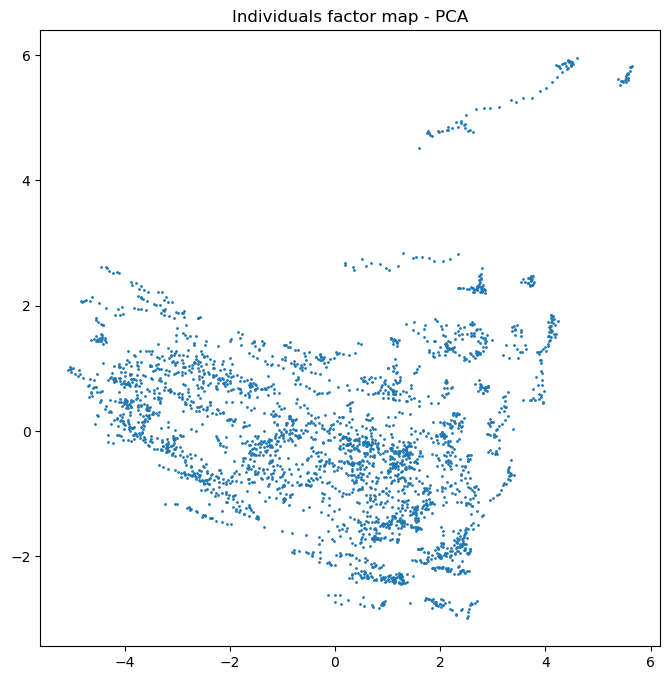

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(data_acp[:, 0], data_acp[:, 1], s=1, linewidths=1)
plt.title("Individuals factor map - PCA")
plt.show()

In [31]:
data_reduit = data_acp[:,:7]

### 8. Visualisation de la dépendence de la varibale Year et de la variable à prédire

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Difference entre 2000 et 2020 :  0.3738180373038201


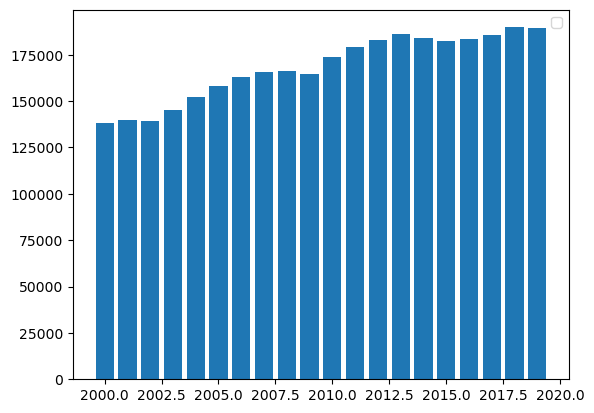

In [32]:
# Faire une moyenne du CO2 sur les années et plot 
# On créer un tableau avec la moyenne pour chaque année de l'emission en CO2
# On reprend data car on veut Value_CO2 sans le log

Annee_valeurs = data.Year.value_counts()
Annee_valeurs_trie = Annee_valeurs.sort_index()
Annee_valeurs_trie = Annee_valeurs_trie[:-1]
Annee_index = Annee_valeurs_trie.index

data_np = data.to_numpy()
Moy_Annees_CO2=[]
for i in Annee_index:
    subset = data_np[data_np[:, 1] == i]
    if Annee_valeurs_trie[i] !=0 :
        Moy_Annees_CO2.append(np.sum(subset[:,11])/Annee_valeurs_trie[i])

print("Difference entre 2000 et 2020 : ", (Moy_Annees_CO2[-1] - Moy_Annees_CO2[0])/Moy_Annees_CO2[0])
plt.bar(Annee_index,Moy_Annees_CO2)
plt.legend()


**Interprétation :**

On observe nettement que la moyenne de CO2 augmente très fortement avec les années. Celle-ci passe de 140000 metric tons per capita en 2000 à près de 190000 en 2019. Entre 2000 et 2020 on observe donc une augmentation de 37,38%.

La modélisation que nous allons faire ne prend pas en compte les variables qualitatives soient 'Year' et 'Entity'. Mais il est important de se rappeler qu'il y a une nette infulence de ces variables sur la prédicton de CO2. Elle dépend beaucoup du pays et de l'année comme on a pu le montrer pécédement. Cependant, il semblerait que l'année et le pays soient représentés par les autres variables : chaque pays par année a différentes valeur d'Access_to_fuels, d'Acces_to_elec ... La valeur de CO2 est en faite liée aux variables quantitavies qui sont effectivement différentes d'un pays à l'autre et d'une année à l'autre. C'est cela qui influe la valeur du CO2 et non littéralement la valeur qualitative de l'année ou du pays.

# Modélisation de la variable Value_CO2

Après cette analyse exploratoire, nous considérons maintenant le problème de modélisation et prédiction de la variable CO2. Nous mettons en place divers algorithmes de régression afin de la prédire et nous comparerons les résultats obtenus. Pour cette partie, nous utilisons le jeu de données sans valeurs manquantes avec les variables recentrées par les transformations logarithmiques.

La variable CO2 étant très corrélée avec la variable Elec_from_fossil, nous l'enlevons du jeu de données dans un but éducatif.

### 1. Création des échantillons test et apprentissage

Cette étape est essentielle pour évaluer la qualité d'une prédiciton. Il est nécessaire d'évaluer l'erreur d'apprentissage en utilisant des données différentes de celles qui ont servi à l'entrainement. On garde donc 20% des données pour faire les tests. Cela va nous permettre d'évaluer la performance réelle du modèle sur des données non vues. Cela simule le scénario où le modèle est déployé sur de nouvelles observations et évalue la capacité du modèle à s'adapter à un nouveau jeu de données.

In [148]:
from sklearn.model_selection import train_test_split

dataQuant=data_centre[["Access_to_elec","Access_to_fuels","Renewable_energy_share","L_Elec_from_nuclear","L_Elec_from_renewables","Low_carbon_elec","L_Prim_energy_cons","L_Energy_intensity_level","Gdp_growth","L_Gdp_capita","L_Density","Land_area","Latitude","Longitude"]]


CO2 = data_centre["L_Value_CO2"]
X_train, X_test, CO2_train, CO2_test = train_test_split(dataQuant,CO2,test_size=0.2, random_state=11)

print(f"Résumé de l'échantillon d'apprentissage : {X_train.shape[0]} individus et {X_train.shape[1]} variables")
print(f"Résumé de l'échantillon de test : {X_test.shape[0]} individus et {X_test.shape[1]} variables")


Résumé de l'échantillon d'apprentissage : 2294 individus et 14 variables
Résumé de l'échantillon de test : 574 individus et 14 variables


In [34]:
from sklearn.preprocessing import StandardScaler

# il est important de normaliser les données pour certains modèles tels que :
# SVM, modèles avec pénalisation, réseaux de neurones...

scaler = StandardScaler()
scaler.fit(X_train)
Xr_train = scaler.transform(X_train)

Xr_test = scaler.transform(X_test)

Nous allons effetcuer nos tests avec table de contingence en regardant si la prédiction que la valeur du CO2 est plus grande que la valeur moyenne mondiale.

In [150]:
CO2_moy = np.mean(CO2)
print('Valeur moyenne du CO2 au cours des ans = ',CO2_moy)

Valeur moyenne du CO2 au cours des ans =  9.330435494034832


### 2. Etablissement des différents modèles de régression

Nous implétons ici les différents algorithmes de régression afin de prédire la variable CO2 : Modèles Linéaires (pénalisés ou non), SVR, Arbre, Forêts Aléatoires, Boosting et Réseaux de Neurones.



### Modèles Linéaires

#### Régression linéaire sans sélection de variable

Nous avons ici uniquement des variables quantitatives donc nous allons effectuer une regression linéaire multiple. La régression linéaire multiple permet d'examiner comment plusieurs variables quantitatives influencent une variable dépendante quantitative.

In [126]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

reg_lin =  LinearRegression()
reg_lin.fit(Xr_train, CO2_train)

CO2_pred_lin = reg_lin.predict(Xr_test)

coefficients = pd.DataFrame(reg_lin.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients)

mse_lin = mean_squared_error(CO2_test,CO2_pred_lin)
R2_lin = r2_score(CO2_test,CO2_pred_lin)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_lin = 1 - ((1 - R2_lin) * (n - 1) / (n - p - 1))

# Résidus
residuals_lin = CO2_test - CO2_pred_lin

                          Coefficient
Access_to_elec              -0.316842
Access_to_fuels              0.386786
Renewable_energy_share      -0.640197
L_Elec_from_nuclear          0.046369
L_Elec_from_renewables       1.715370
Low_carbon_elec             -0.525191
L_Prim_energy_cons           0.016713
L_Energy_intensity_level     0.255610
Gdp_growth                   0.043570
L_Gdp_capita                -0.076736
L_Density                    0.089652
Land_area                    0.127014
Latitude                     0.294111
Longitude                    0.270180


Text(0.5, 1.0, ' Résidus du modèle de régression linéaire')

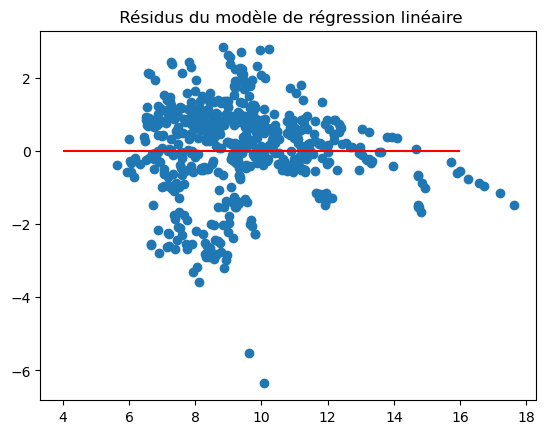

In [151]:
plt.scatter(CO2_pred_lin, residuals_lin)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle de régression linéaire")

In [152]:
print("erreur de régression : ",mse_lin)

erreur de régression :  1.517803167221267


In [157]:
from sklearn.metrics import confusion_matrix

pred_factor = (CO2_pred_lin > CO2_moy).astype(int)

true_factor = (CO2_test > CO2_moy).astype(int)

confusion_mat = confusion_matrix(true_factor, pred_factor)

print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[259  16]
 [ 60 239]]


#### Régression linéaire avec les termes quadratiques

In [127]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
Xr_train_poly = poly.fit_transform(Xr_train)

reg_lin_2 = LinearRegression()
reg_lin_2.fit(Xr_train_poly, CO2_train)

poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)
coefficients = pd.DataFrame({'Variable': poly_feature_names, 'Coefficient': reg_lin_2.coef_})
print(coefficients)

Xr_test_2 = poly.transform(Xr_test)

CO2_pred_lin2 = reg_lin_2.predict(Xr_test_2)

mse_lin2 = mean_squared_error(CO2_test,CO2_pred_lin2)
R2_2 = r2_score(CO2_test,CO2_pred_lin2)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_2 = 1 - ((1 - R2_2) * (n - 1) / (n - p - 1))

# Résidus :
residuals_lin_2 = CO2_test - CO2_pred_lin2

                   Variable   Coefficient
0                         1  1.533550e-15
1            Access_to_elec  6.133247e-01
2           Access_to_fuels -3.118627e-01
3    Renewable_energy_share  6.669955e-01
4       L_Elec_from_nuclear -4.399802e-01
..                      ...           ...
115      Land_area Latitude  5.515260e-01
116     Land_area Longitude  4.962142e-01
117              Latitude^2  5.451040e-03
118      Latitude Longitude  1.926567e-01
119             Longitude^2 -1.981814e-01

[120 rows x 2 columns]


Text(0.5, 1.0, ' Résidus du modèle de régression quadratique')

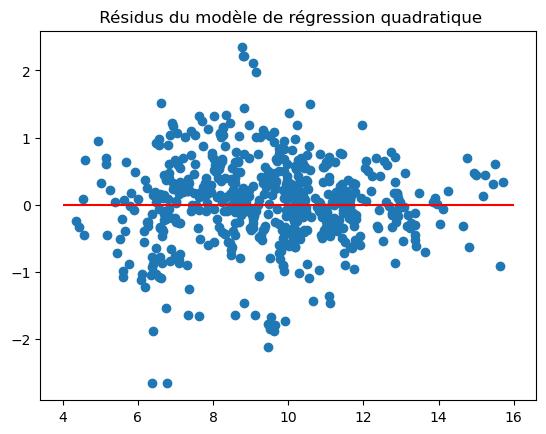

In [165]:
plt.scatter(CO2_pred_lin2, residuals_lin_2)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle de régression quadratique")

In [164]:
print("erreur de régression : ",mse_lin2)

erreur de régression :  0.435072476147789


In [162]:
from sklearn.metrics import confusion_matrix

pred_factor = (CO2_pred_lin2 > CO2_moy).astype(int)

true_factor = (CO2_test > CO2_moy).astype(int)

confusion_mat = confusion_matrix(true_factor, pred_factor)

print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[253  22]
 [ 21 278]]


#### Régression avec pénalisation Lasso

Nous appliquons ici la pénalisation Lasso qui permet de sélectionner des variables en appliquant une pénalisation l1.

Avec la méthode Lasso, le but est de minimiser : $\frac{1}{2n_{samples}}||y - Xw||^2_2 + \alpha||w||_1$

- Ici, on va faire varier le paramètre lambda qui se trouve devant la pénalité l1. Mettre $\alpha = 0$ revient à réaliser une méthode de moindres carrés. $\alpha$ contrôle le niveau de régularisation : si $\alpha$ est grand les coefficients seront plus petits et la sélection des variables sera plus stricte.
- Les $w_j$ sont les coefficients associés à chaque variable qui vont être réduis et\ou mis à zéros.

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param=[{"alpha":[0.001,0.005,0.01,0.02,0.05]}]

reg_lasso = Lasso(max_iter=10000)
reg_lasso = GridSearchCV(estimator=reg_lasso,param_grid=param, cv=10)

regOpt_lasso = reg_lasso.fit(Xr_train,CO2_train)

best_lasso = regOpt_lasso.best_estimator_

print("Meilleur paramètre alpha:", regOpt_lasso.best_params_["alpha"])

CO2_pred_lasso = regOpt_lasso.predict(Xr_test)

mse_lasso = mean_squared_error(CO2_test, CO2_pred_lasso)
R2_lasso = r2_score(CO2_test,CO2_pred_lasso)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_lasso = 1 - ((1 - R2_lasso) * (n - 1) / (n - p - 1))

# Résidus :
residuals_lasso = CO2_test - CO2_pred_lasso

Meilleur paramètre alpha: 0.005


In [38]:
# Coefficients
coef = pd.Series(best_lasso.coef_, index=X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 13 variables et en supprime 1


In [39]:
print("----- Les variables que Lasso a supprimé -----")
print("")
print(coef[coef==0])
print("")
print("----- Les variables qui ont le plus de poids dans le modèles Lasso -----")
print("")
print(coef[abs(coef)>0.2])

----- Les variables que Lasso a supprimé -----

L_Prim_energy_cons   -0.0
dtype: float64

----- Les variables qui ont le plus de poids dans le modèles Lasso -----

Access_to_elec             -0.259109
Access_to_fuels             0.331856
Renewable_energy_share     -0.628021
L_Elec_from_renewables      1.693210
Low_carbon_elec            -0.515718
L_Energy_intensity_level    0.260030
Latitude                    0.289134
Longitude                   0.269657
dtype: float64


Text(0.5, 1.0, ' Résidus du modèle de régression linéaire avec sélection Lasso')

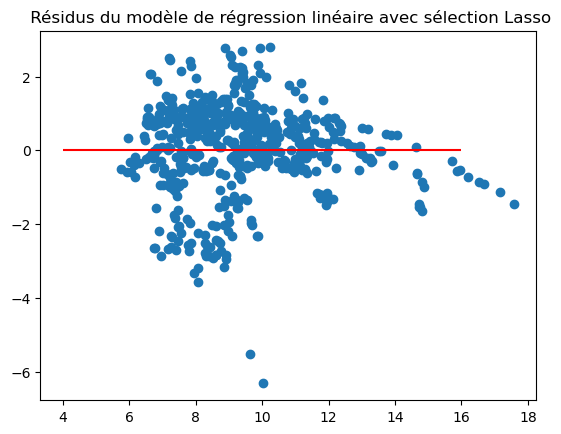

In [158]:
plt.scatter(CO2_pred_lasso, residuals_lasso)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle de régression linéaire avec sélection Lasso")

In [155]:
print("erreur de régression : ",mse_lasso)

erreur de régression :  1.5192127457022269


In [156]:
from sklearn.metrics import confusion_matrix

pred_factor = (CO2_pred_lasso > CO2_moy).astype(int)

true_factor = (CO2_test > CO2_moy).astype(int)

confusion_mat = confusion_matrix(true_factor, pred_factor)

print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[258  17]
 [ 60 239]]


### Régression quadratique avec pénalisation lasso

In [129]:
from sklearn.pipeline import make_pipeline

column_names = X_train.columns.tolist()
column_names_poly = ['1'] + column_names  
column_names_poly += [f"{col}^2" for col in column_names]  
column_names_poly += [f"{col1}*{col2}" for i, col1 in enumerate(column_names) for col2 in column_names[i+1:]]  
column_names_poly = np.array(column_names_poly)

param_grid = {
    'lasso__alpha': [0.001, 0.003, 0.01, 1.0]  
    }


lasso_model2 = make_pipeline(PolynomialFeatures(degree=2), Lasso(max_iter=10000))

grid_search = GridSearchCV(lasso_model2, param_grid, cv=5, scoring='neg_mean_squared_error')

lasso_Opt2 = grid_search.fit(Xr_train, CO2_train)

best_alpha = lasso_Opt2.best_params_['lasso__alpha']
print("Meilleur paramètre alpha:", best_alpha)

best_model = lasso_Opt2.best_estimator_
CO2_pred_lasso2 = best_model.predict(Xr_test)


mse_lasso2 = mean_squared_error(CO2_test, CO2_pred_lasso2)
R2_lasso2 = r2_score(CO2_test,CO2_pred_lasso2)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_lasso_2 = 1 - ((1 - R2_lasso) * (n - 1) / (n - p - 1))

# Résidus :
residuals_lasso2 = CO2_test - CO2_pred_lasso2

Meilleur paramètre alpha: 0.001


In [41]:
# Afficher les coefficients non nuls
coef = best_model.named_steps['lasso'].coef_
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 110 variables et en supprime 10


In [42]:
print("----- Les variables que Lasso a supprimé -----")
print("")
selected_features = np.array(column_names_poly)[np.where(np.abs(coef) == 0)]
print(selected_features)
print("")
print("----- Les variables qui ont le plus de poids dans le modèles Lasso -----")
print("")
selected_features = np.array(column_names_poly)[np.where(np.abs(coef) > 0.7)]
print(selected_features)

----- Les variables que Lasso a supprimé -----

['1' 'L_Elec_from_nuclear^2' 'Land_area^2'
 'Access_to_elec*L_Prim_energy_cons' 'Access_to_elec*Land_area'
 'L_Elec_from_nuclear*L_Prim_energy_cons'
 'L_Elec_from_nuclear*L_Gdp_capita'
 'Low_carbon_elec*L_Energy_intensity_level' 'Low_carbon_elec*L_Density'
 'L_Prim_energy_cons*Land_area']

----- Les variables qui ont le plus de poids dans le modèles Lasso -----

['L_Elec_from_renewables' 'L_Prim_energy_cons' 'L_Density' 'Land_area'
 'Access_to_fuels^2' 'Access_to_elec*Low_carbon_elec'
 'Access_to_elec*L_Gdp_capita' 'Access_to_fuels*Land_area'
 'L_Elec_from_renewables*Land_area' 'Low_carbon_elec*L_Gdp_capita'
 'Low_carbon_elec*Land_area' 'L_Gdp_capita*Land_area']


Text(0.5, 1.0, ' Résidus du modèle de régression quadratique avec sélection Lasso')

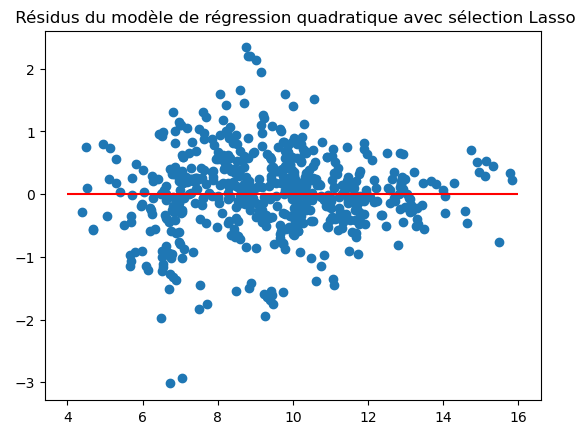

In [166]:
plt.scatter(CO2_pred_lasso2, residuals_lasso2)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle de régression quadratique avec sélection Lasso")

In [167]:
print("erreur de régression : ",mse_lasso2)

erreur de régression :  0.4366827721308322


In [168]:
from sklearn.metrics import confusion_matrix

pred_factor = (CO2_pred_lasso2 > CO2_moy).astype(int)

true_factor = (CO2_test > CO2_moy).astype(int)

confusion_mat = confusion_matrix(true_factor, pred_factor)

print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[256  19]
 [ 23 276]]


#### Régression linéaire avec pénalisation Ridge

Il est aussi possible d’ajuster notre modèle en appliquant une pénalisation l2. Cela ne va pas faire de la sélection de variable mais nous apporter une solution unique.

Dans ce modèle, notre but est de minimiser cette fonction : $||y - Xw||^2_2 + \alpha||w||^2_2$.
On va donc chercher à optimiser le paramètre alpha qui se trouve devant le terme de pénalisation l2. 

$\alpha$ est le paramètre de régularisation. Ce paramètre contrôle la force de la pénalisation appliquée aux coefficients du modèle. Plus $\alpha$ est grand, plus la pénalité sur les coefficients est forte, ce qui conduit à des solutions plus régulières. On fait de l'over-fitting quand la pénalité vaut 0 et de l'under-fitting quand elle est trop grande.

In [130]:
from sklearn.linear_model import Ridge

param=[{"alpha":[0.01,0.05,0.07,0.1,1,5,10]}] 

reg_ridge = Ridge()
reg_ridge = GridSearchCV(estimator=reg_ridge,param_grid=param, cv=10)

regOpt_ridge = reg_ridge.fit(Xr_train,CO2_train)

best_ridge = regOpt_ridge.best_estimator_

print("Meilleur paramètre alpha:", regOpt_ridge.best_params_["alpha"])

CO2_pred_ridge = regOpt_ridge.predict(Xr_test)

mse_ridge = mean_squared_error(CO2_test, CO2_pred_ridge)
R2_ridge = r2_score(CO2_test,CO2_pred_ridge)

n = len(CO2_test)
p = Xr_test.shape[1]
adjusted_R2_ridge = 1 - ((1 - R2_ridge) * (n - 1) / (n - p - 1))

# Résidus 
residuals_ridge = CO2_test - CO2_pred_ridge

Meilleur paramètre alpha: 5


Text(0.5, 1.0, ' Résidus du modèle de régression linéaire avec pénalisation ridge')

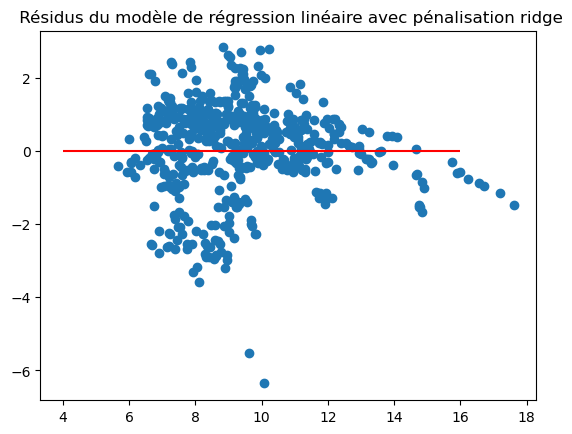

In [159]:
plt.scatter(CO2_pred_ridge, residuals_ridge)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle de régression linéaire avec pénalisation ridge")

In [160]:
print("erreur de régression : ",mse_ridge)

erreur de régression :  1.517945886119741


In [161]:
from sklearn.metrics import confusion_matrix

pred_factor = (CO2_pred_ridge > CO2_moy).astype(int)

true_factor = (CO2_test > CO2_moy).astype(int)

confusion_mat = confusion_matrix(true_factor, pred_factor)

print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[259  16]
 [ 60 239]]


### Comparaison des modèles de régression

 ----- Comparaison des MSE ----- 
MSE quadratique =  0.435072476147789
MSE Lasso quadratique =  0.4366827721308322
 ----- Comparaison des R2 ----- 
R2 quadratique =  0.9161283729942137


/var/folders/gn/sy_p6gyd0s15vprgs70pb0dr0000gn/T/ipykernel_64536/3531233264.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(ind,rotation=45)
/var/folders/gn/sy_p6gyd0s15vprgs70pb0dr0000gn/T/ipykernel_64536/3531233264.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(ind,rotation=45)


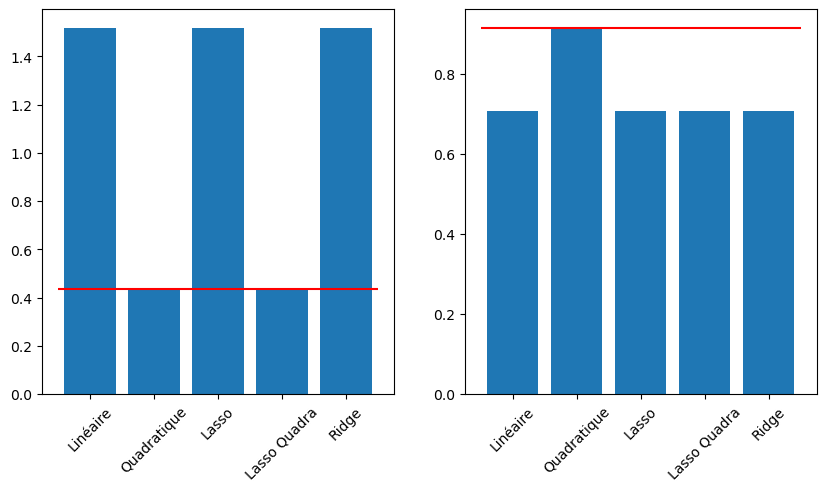

In [169]:
print(" ----- Comparaison des MSE ----- ")
print("MSE quadratique = ", mse_lin2)
print("MSE Lasso quadratique = ",mse_lasso2)

print(" ----- Comparaison des R2 ----- ")
print("R2 quadratique = ",adjusted_R2_2)

fig ,axs = plt.subplots(1,2, figsize=(10,5))

ind = ["Linéaire","Quadratique","Lasso","Lasso Quadra","Ridge"]
list_MSE = [mse_lin,mse_lin2,mse_lasso,mse_lasso2,mse_ridge]
axs[0].bar(ind,list_MSE)
axs[0].set_xticklabels(ind,rotation=45)
axs[0].hlines(mse_lin2,-0.5,4.5,color="red")

list_R2 = [adjusted_R2_lin,adjusted_R2_2,adjusted_R2_lasso,adjusted_R2_lasso_2,adjusted_R2_ridge]
axs[1].bar(ind,list_R2)
axs[1].set_xticklabels(ind,rotation=45)
axs[1].hlines(adjusted_R2_2,-0.5,4.5,color="red")

**Interpretation :**

Les histogramme ci-dessus représentent respictivement les différentes erreurs moyennes quadratiques de chaque modèle et les différents R2 ajustés. 

On cherche à minimiser l'erreur de régression. La méthode de regression linéaire avec interaction est la plus efficace des méthodes linéaires suivie de celle avec selection de variables par critère de Lasso. 

De plus, parmi ces deux méthodes, celle qui a le coefficient R2 ajusté le plus élevé est la méthode de régression quadratique.

Text(0.5, 1.0, ' Résidus du modèle de régression quadratique avec pénalisation lasso ')

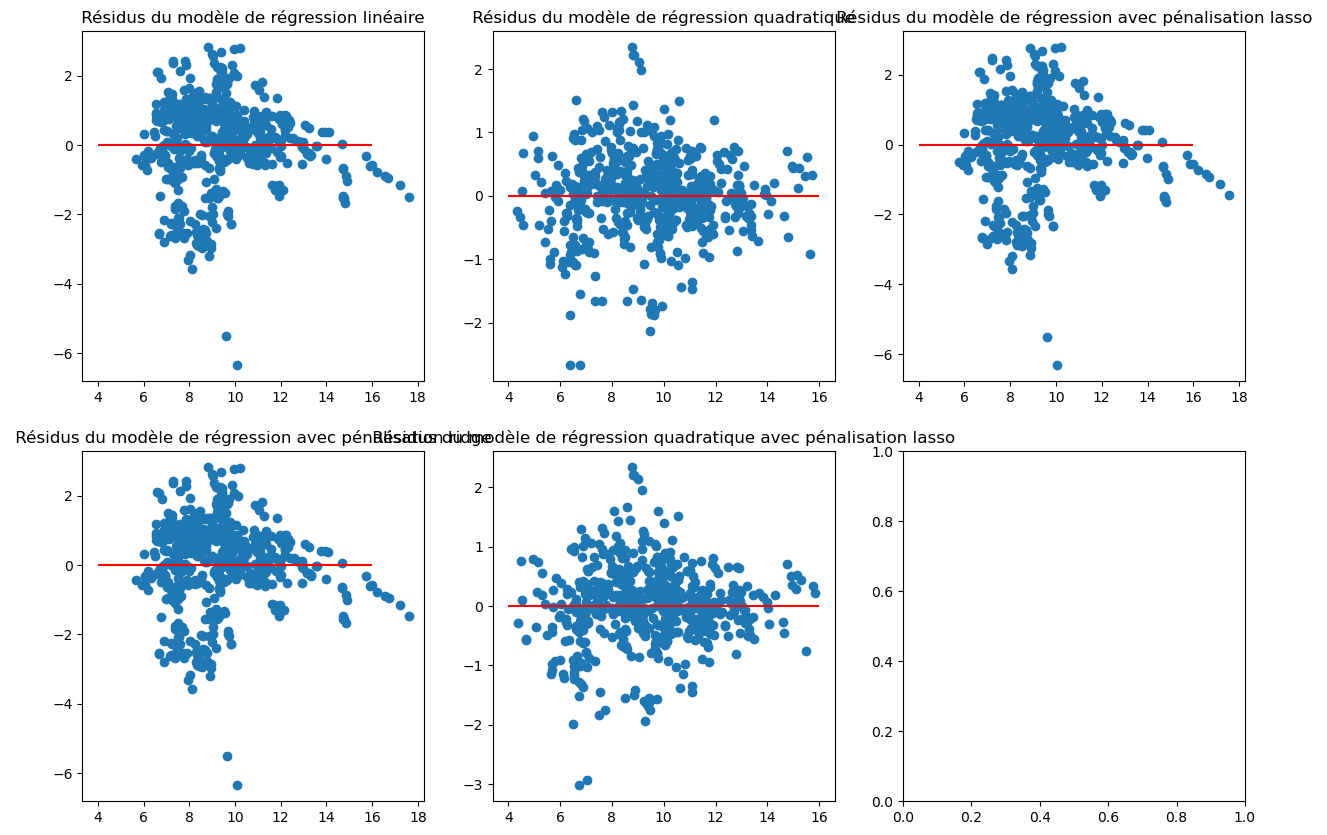

In [45]:
# ----- Comparaison des résidus ----- 
fig ,axs = plt.subplots(2,3, figsize=(15,10))

axs[0,0].scatter(CO2_pred_lin, residuals_lin)
axs[0,0].hlines(0,4,16,color="red")
axs[0,0].set_title(" Résidus du modèle de régression linéaire ")

axs[0,1].scatter(CO2_pred_lin2, residuals_lin_2)
axs[0,1].hlines(0,4,16,color="red")
axs[0,1].set_title(" Résidus du modèle de régression quadratique ")

axs[0,2].scatter(CO2_pred_lasso, residuals_lasso)
axs[0,2].hlines(0,4,16,color="red")
axs[0,2].set_title(" Résidus du modèle de régression avec pénalisation lasso ")

axs[1,0].scatter(CO2_pred_ridge, residuals_ridge)
axs[1,0].hlines(0,4,16,color="red")
axs[1,0].set_title(" Résidus du modèle de régression avec pénalisation ridge ")

axs[1,1].scatter(CO2_pred_lasso2, residuals_lasso2)
axs[1,1].hlines(0,4,16,color="red")
axs[1,1].set_title(" Résidus du modèle de régression quadratique avec pénalisation lasso ")


**Interprétation :**

On observe que les résidus qui sont le plus centrés autour de 0 sont ceux des modèles quadratiques. Cela valide nos conclusions de la partie précédente.

Text(0.5, 0, ' Valeurs Prédites ')

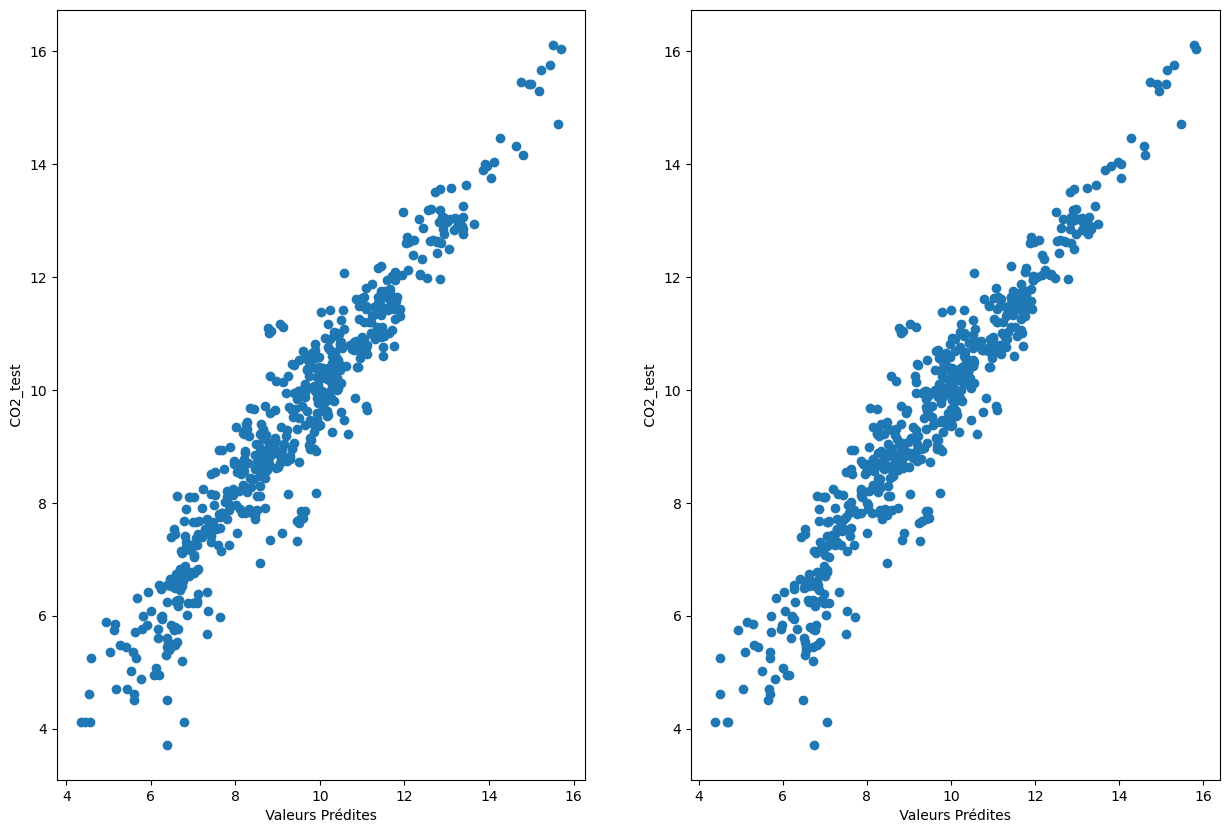

In [170]:
##### Autre potentiel code
fig ,axs = plt.subplots(1,2, figsize=(15,10))

axs[0].scatter(CO2_pred_lin2, CO2_test)
axs[0].set_ylabel(" CO2_test ")
axs[0].set_xlabel(" Valeurs Prédites ")

axs[1].scatter(CO2_pred_lasso2, CO2_test)
axs[1].set_ylabel(" CO2_test ")
axs[1].set_xlabel(" Valeurs Prédites ")

**Interprétation :**

La droite a un coefficient directeur de 1 (x=y) or on remarque des outliers rendant la droite plus large. La prédiction n'est pas optimale.

#### SVM Regression

SVR cherche à trouver un hyperplan qui prédit le plus précisément possible les valeurs de sortie continue. Le but de la SVR (Support Vector Regression) est de minimiser l'équation suivante : $\frac{1}{2}||w||^2 + C\sum_{1,..,n}{\epsilon_i}$. L'objectif est de s'assurer que les prédictions se trouvent à une distance $\epsilon$ des valeurs réelles.

Il nous faut choisir le kernel, le paramère de régularisation  et C.

- Le kernel détermine la nature de la transformation des données pour capturer des relations non linéaires. On choisit de prendre un noyau Gaussien car nous avons des données quantitatives et nous avons effectué une transformation logarithmique pour centrer les données.
- C détermine la tolérance de mauvaise classification. Si C augmente, le nombre de mauvaises classifications diminue et inversement. Ici, il est calibré par validation croisée.
- Epsilon ($\epsilon$) représente la tolérance autour des marges. On n'applique pas de pénalité à cet endroit-là.
- Gamma ($\gamma$) définit l'influence d'un seul exemple d'apprentissage : une valeur de gamma élevée permet de mieux expliquer le modèle, mais peut aussi conduire à un surajustement.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [120]:
# initialisation de la class 
svr = SVR()

# definition des paramètres
parameters = {'C': [500,800,1000], 'gamma':[0.03,0.05,0.08], 'epsilon':[0.01,0.03,0.05]}

# premier entrainement pour trouver les paramètres optimaux
svr_param = GridSearchCV(svr, parameters,cv=5,n_jobs=-1)
svr_param.fit(Xr_train, CO2_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [500, 800, 1000], 'epsilon': [0.01, 0.03, 0.05],
                         'gamma': [0.03, 0.05, 0.08]})

In [121]:
print("Meilleurs paramètres trouvés:", svr_param.best_params_)

Meilleurs paramètres trouvés: {'C': 800, 'epsilon': 0.03, 'gamma': 0.05}


In [122]:
svr_best = SVR(C=svr_param.best_params_['C'], epsilon=svr_param.best_params_['epsilon'],gamma=svr_param.best_params_['gamma'])
svr_best.fit(Xr_train, CO2_train)

SVR(C=800, epsilon=0.03, gamma=0.05)

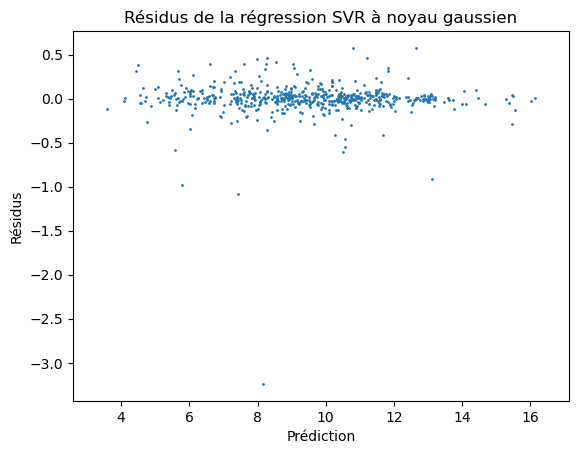

In [123]:
CO2_pred_svmr = svr_best.predict(Xr_test)

res_svmr = CO2_pred_svmr - CO2_test

mse_svr = mean_squared_error(CO2_test, CO2_pred_svmr)


# affichage des résidus
plt.scatter(CO2_pred_svmr, res_svmr, s=1)
plt.xlabel("Prédiction")
plt.ylabel("Résidus")
plt.title("Résidus de la régression SVR à noyau gaussien")
plt.xlim(min(CO2_pred_svmr) - 1, max(CO2_pred_svmr) + 1)
# plt.ylim(-0.75,0.75)
plt.show()

In [172]:
print("Erreur de régression : ",mse_svr)

Erreur de régression :  0.0391025401550246


In [171]:
from sklearn.metrics import confusion_matrix

pred_factor = (CO2_pred_svmr > CO2_moy).astype(int)

true_factor = (CO2_test > CO2_moy).astype(int)

confusion_mat = confusion_matrix(true_factor, pred_factor)

print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[270   5]
 [  5 294]]


Text(0.5, 0, ' Valeurs Prédites par SVR')

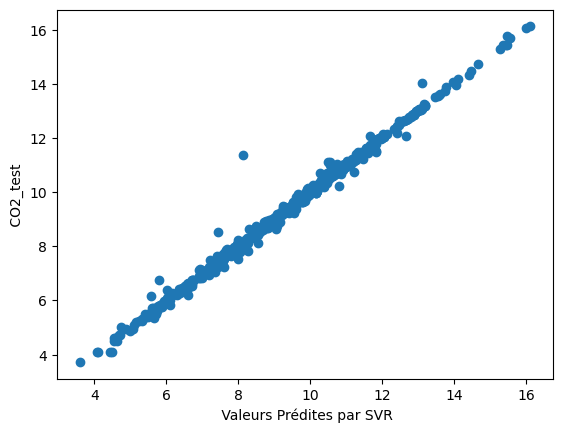

In [125]:
plt.scatter(CO2_pred_svmr, CO2_test)
plt.ylabel(" CO2_test ")
plt.xlabel(" Valeurs Prédites par SVR")

#### Arbre de régression optimal

C'est une méthode non paramétrique qui permet de construire des estimateurs en multidimension.

Cette méthode a pour but de regrouper nos données selons différentes caractéristiques. Pour cela, à chaque noeud de l'arbre, on va essayer de séparer notre jeu de donnée en fonction d'un seuil d'une variable qui nous permet d'avoir 2 groupes plus homogènes.

Cp est le paramètre de complexité qui contrôle la croissance de l'arbre en utilisant le critère de coût-complexité. Une valeur plus grande de cp entraîne un arbre plus petit et plus simple, tandis qu'une valeur plus petite peut conduire à un arbre plus complexe et surajusté. On cherche la valeur du cp qui permet de minimiser l'erreur.

In [53]:
from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,20)), "ccp_alpha":[0.001,0.003,0.01,0.02]}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, CO2_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.022715, Meilleur paramètre = {'ccp_alpha': 0.001, 'max_depth': 19}


In [54]:
best_index = np.argmin(treeOpt.cv_results_['mean_test_score'])

best_index_numeric = float(best_index)

best_model = treeOpt.best_estimator_

print("Meilleur score obtenu par CV = ", treeOpt.cv_results_['mean_test_score'][best_index])

Meilleur score obtenu par CV =  0.547134890343518


In [55]:
# Estimation de l'erreur de prévision
print("Estimation de l'erreur de prévision : ",1-treeOpt.score(Xr_test,CO2_test))

Estimation de l'erreur de prévision :  0.024224727377288424


In [173]:
# prévision de l'échantillon test
CO2_pred_cart = treeOpt.predict(Xr_test)

In [176]:
pred_factor = (CO2_pred_cart > CO2_moy).astype(int)

true_factor = (CO2_test > CO2_moy).astype(int)

confusion_mat = confusion_matrix(true_factor, pred_factor)

print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[265  10]
 [ 22 277]]


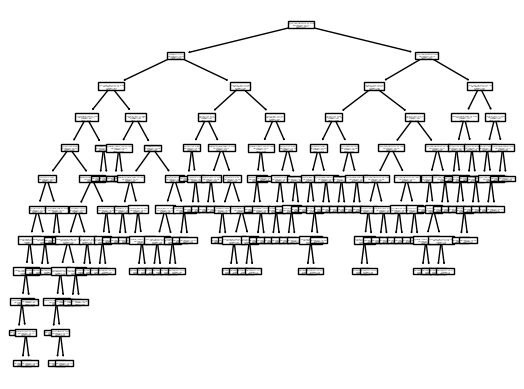

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

treeG = best_model
treeG.fit(Xr_train,CO2_train)
plot_tree(treeG,feature_names=dataQuant.columns.tolist())
plt.show()
feature_names=dataQuant.columns.tolist()

**Interprétation :**

La variable L_Elec_from_nuclear est la variable contribuant le plus à l'interprétation. Elle créer la première séparation de notre jeux de données. Les deux autres variables les plus importantes sont la latitude et l'électricité produite par énergie renouvelable. Cela est cohérant avec l'ACP que nous avons fait précédement : ce sont des variables qui participaient beaucoup aux dimensions 1 et 2 expliquant plus de 50% de la variance du jeu de données.

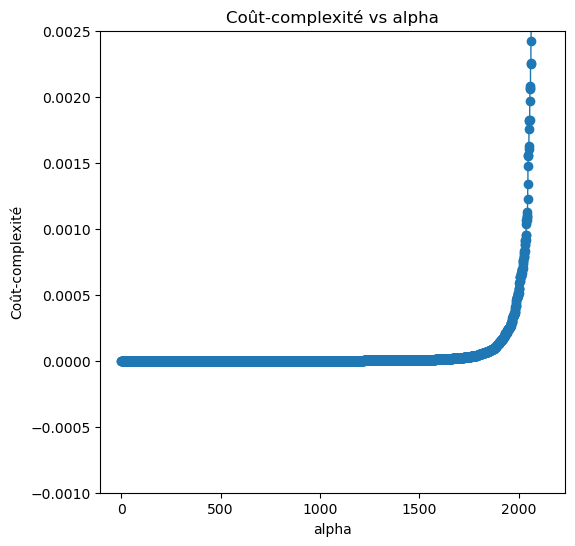

min des alphas =  1.5486982034875768e-18


In [59]:
# Calcul des coûts de complexité
ccp_alphas = treeG.cost_complexity_pruning_path(Xr_train, CO2_train)["ccp_alphas"]

plt.figure(figsize=(6, 6))
plt.plot(ccp_alphas, marker='o', drawstyle="steps-post",linewidth=1)
plt.xlabel("alpha")
plt.ylim(-0.001,0.0025)
plt.ylabel("Coût-complexité")
plt.title("Coût-complexité vs alpha")
plt.show()
print("min des alphas = ",min(ccp_alphas[1:]))

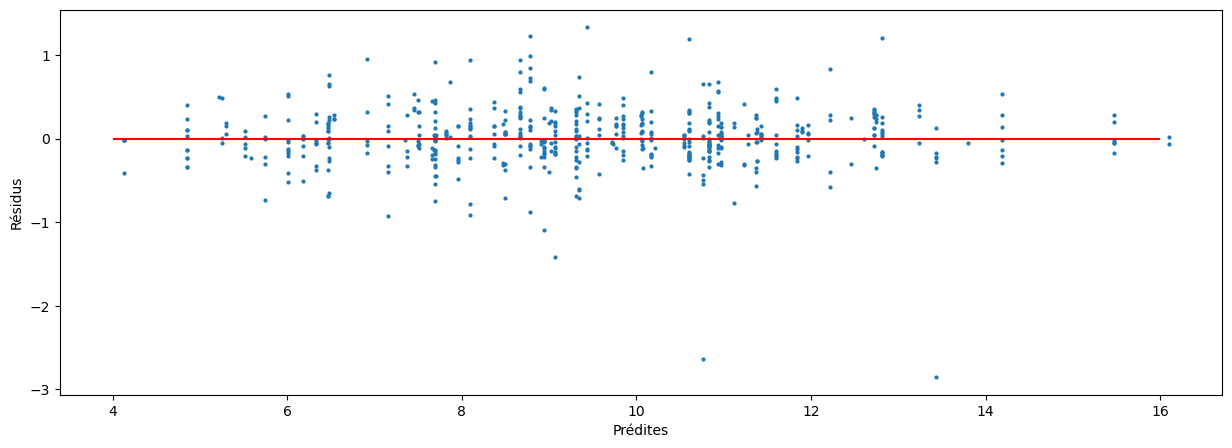

In [60]:
# Graphe des Résidus
CO2_pred_arbre=treeG.predict(Xr_test)

mse_arbre = mean_squared_error(CO2_test, CO2_pred_arbre)

residuals_arbre = CO2_test-CO2_pred_arbre

plt.figure(figsize=(15,5))
plt.plot(CO2_pred_arbre,residuals_arbre,"o",markersize=2, linewidth = 0.01)
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,4,16,color="red")
plt.show()

In [175]:
print("Erreur de régression : ",mse_arbre)

Erreur de régression :  0.12880960663894497


Text(0.5, 0, ' Valeurs Prédites par CART')

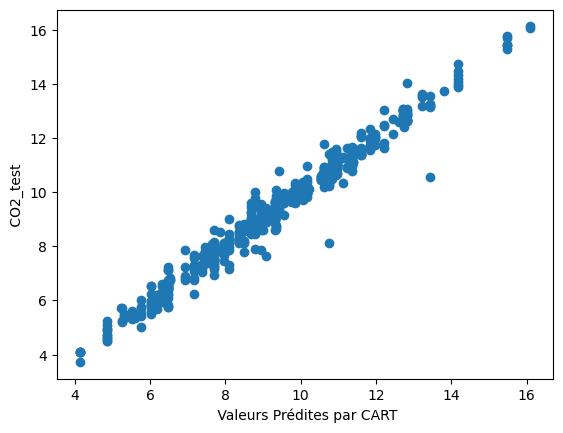

In [80]:
plt.scatter(CO2_pred_arbre, CO2_test)
plt.ylabel(" CO2_test ")
plt.xlabel(" Valeurs Prédites par CART")

### Random Forest

On va voir s’il est possible d’améliorer le modèle précédent en faisant une méthode de Random Forest. Le but étant de créer pleins d’arbres à partir d’échantillons créés par bootstrap du jeu de données d’apprentissage. Cela va nous permettre d’avoir une meilleure estimation des paramètres.

Pour les forêts aléatoire, il y a différents paramètres à prendre en compte :

- Le nombre d'arbre de décision. Un nombre plus élevé d'arbres améliore la performance du modèle, mais cela augmente le temps d'entraînement. Nous choisirons n_tree = 1000 afin d'avoir un compris entre ces deux critères.
- La profondeur maximale de chaque arbre de décision. Une profondeur plus élevée peut conduire à un sur-apprentissage, tandis qu'une profondeur plus faible peut entraîner un sous-apprentissage. Nous le fixerons ici à 10.
- Le nombre minimum d'échantillons nécessaire pour diviser un noeud. Une valeur plus élevée peut permettre d'éviter le sur-apprentissage.
- Le nombre minimum d'échantillons requis pour former une feuille.
- Nombre maximum de variables à prendre en compte pour chaque division de l'arbre : on prend $\sqrt p$ car on est dans un modèle de régression
- Le critère de fonctionnement 'criterion'. Il spécifie la fonction utilisée pour mesurer la qualité de la fraction d'un noeud.

In [61]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
   criterion='squared_error', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='sqrt', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,CO2_train)
print("Erreur OOB : ",1-rfFit.oob_score_)

Erreur OOB :  0.003499345070042681


In [62]:
# erreur de prévision sur le test
print("Erreur prévision Test : ",1-rfFit.score(Xr_test,CO2_test))

Erreur prévision Test :  0.0032445505561828902


In [63]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, CO2_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.003992, Meilleur paramètre = {'max_features': 6}


In [64]:
# erreur de prévision sur le test
print("Erreur prévision Test : ",1-rfOpt.score(Xr_test,CO2_test))

Erreur prévision Test :  0.003335427325285134


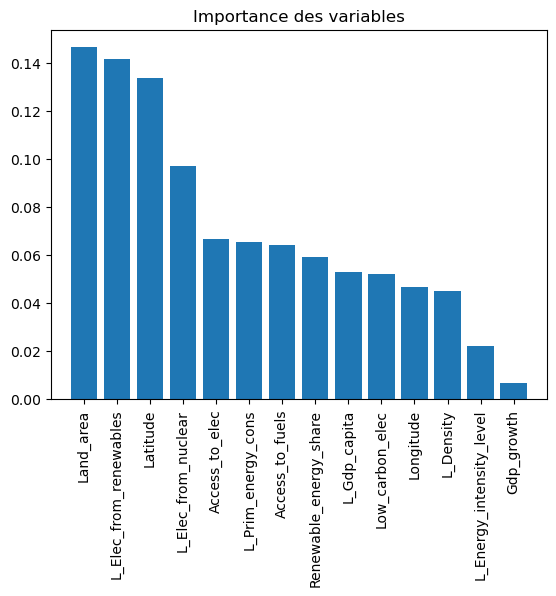

In [65]:
# Importance des variables dans mon modèle
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, CO2_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]

# Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(14), importances[indices])  
plt.xticks(range(14), dataQuant.columns[indices],rotation=90)  
plt.xlim([-1, 14])  
plt.show()

**Interprétation :**

L_Elec_from_renawables, L_Elec_from_nuclear, L_Land_area et Latitude sont les variables participant le plus à l'interprétation. Cela est cohérant avec les résultats obtenue par les arbres et ceux de l'ACP.

Text(0.5, 1.0, ' Résidus du modèle avec Random Forest ')

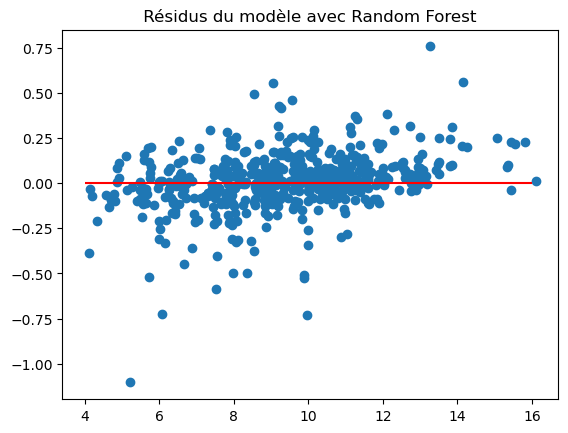

In [66]:
CO2_pred_rf = rfFit.predict(Xr_test)
residuals_rf = CO2_test - CO2_pred_rf

mse_rf = mean_squared_error(CO2_test, CO2_pred_rf)

plt.scatter(CO2_pred_rf, residuals_rf)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle avec Random Forest ")

In [179]:
print("Erreur de Régression : ",mse_rf)

Erreur de Régression :  0.024961654417933164


In [67]:
pred_factor = (CO2_pred_rf > 10).astype(int)

# Convertir les valeurs réelles en facteur (classes)
true_factor = (CO2_test > 10).astype(int)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(true_factor, pred_factor)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[329   5]
 [  4 236]]


Text(0.5, 0, ' Valeurs Prédites ')

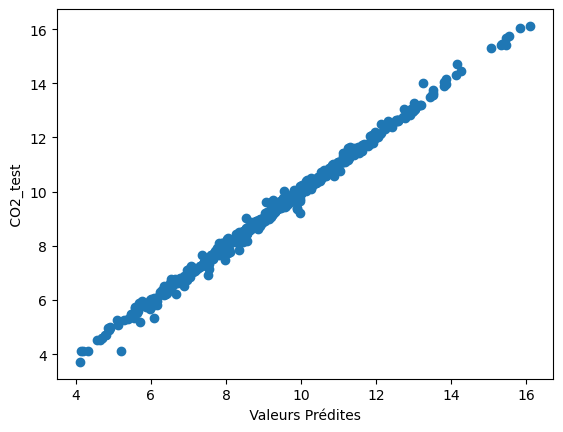

In [83]:
plt.scatter(CO2_pred_rf, CO2_test)
plt.ylabel(" CO2_test ")
plt.xlabel(" Valeurs Prédites ")

### Boosting

On regarde s'il est possible d'avoir une meilleure prédiction de nos données et un temps de calcul moins long. Cette méthode ajuste successivement une série de modèles faibles, en mettant l'accent sur les erreurs des modèles précédents. Chaque nouveau modèle corrige les erreurs des modèles précédents.

La méthode boosting nécéssite le choix de plusieurs paramètres :

- Le taux d'apprentissage, il contrôle la contribution de chaque arbre à la mise à jour du modèle.
- Le nombre d'arbres pris en compte. Une valeur plus élevée de n_estimators peut améliorer les performances du modèle, mais peut également entraîner un temps d'entraînement plus long et un risque de surapprentissage.
- La profondeur maximale des arbres, cela contrôle la complexité des arbres.
- Le nombre d'observation requis dans un noeud.

Nous ferons une validation croisée pour choisir ces paramètres.

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'max_depth': [4,7,9],
    'learning_rate': [0.05, 0.07, 0.1],
    'min_samples_leaf': [5, 7, 10],
    'n_estimators': [1000]
}

# Création du modèle de boosting
boost_reg = GradientBoostingRegressor()

# Configuration de GridSearchCV
regOpt_cv = GridSearchCV(estimator=boost_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

regOpt_boost = regOpt_cv.fit(Xr_train, CO2_train)

CO2_pred_boost = regOpt_cv.predict(Xr_test)

print("Meilleur paramètre = %s" % (regOpt_cv.best_params_))

mse_boost = mean_squared_error(CO2_test, CO2_pred_boost)
R2_boost = r2_score(CO2_test,CO2_pred_boost)

# Résidus :
residuals_boost = CO2_test - CO2_pred_boost


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleur paramètre = {'learning_rate': 0.07, 'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 1000}
Meilleurs hyperparamètres trouvés: {'learning_rate': 0.07, 'max_depth': 7, 'min_samples_leaf': 7, 'n_estimators': 1000}
Meilleure performance (MSE): -0.028324852711291194


In [89]:
print("meilleur estimateur : ",regOpt_cv.best_estimator_.n_estimators)
print(f"Meilleure performance (MSE): {regOpt_cv.best_score_}")

meilleur estimateur :  1000
Meilleure performance (MSE): -0.02755220340124175


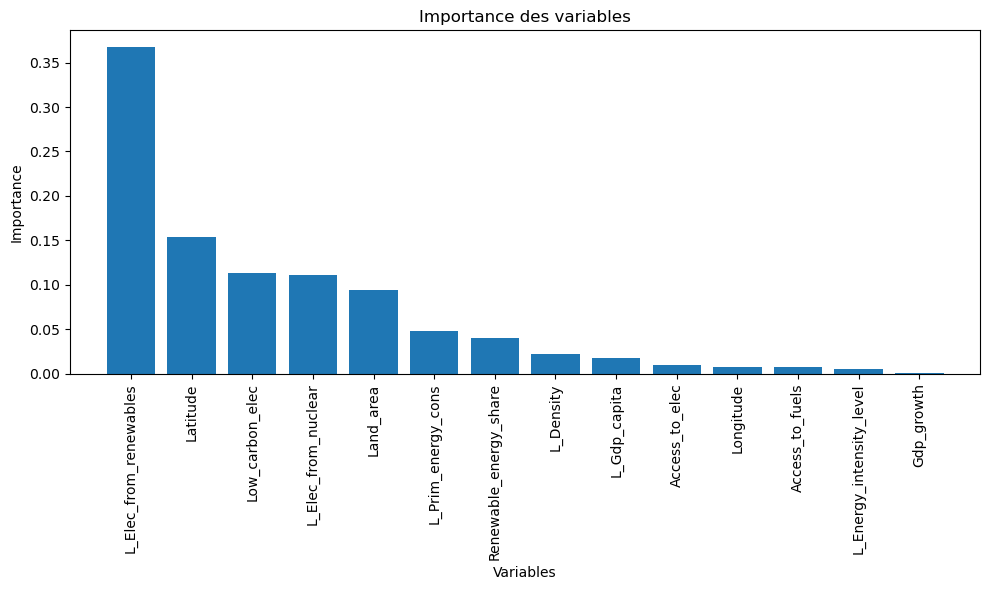

In [92]:
# Importance décroissante des variables
importances = regOpt_boost.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))  
plt.title("Importance des variables")
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), dataQuant.columns[indices], rotation=90)
plt.xlim([-1, len(indices)])  
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.tight_layout()  
plt.show()

**Interprétation :**

Une fois de plus, les 3 mêmes variables apparaissent parmi celles ayant le plus d'importance.

Text(0.5, 1.0, ' Résidus du modèle avec boosting ')

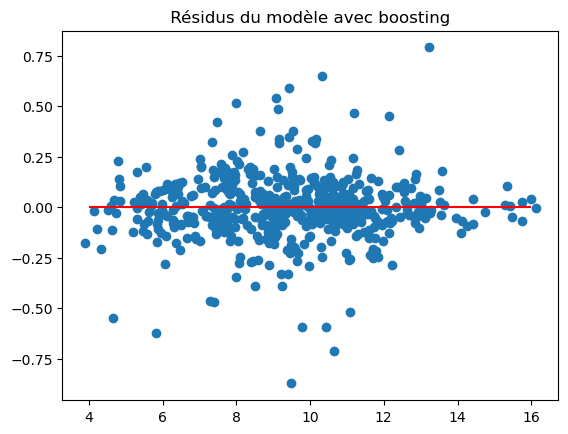

In [93]:
plt.scatter(CO2_pred_boost, residuals_boost)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle avec boosting ")

In [180]:
print("Erreur de régression : ",mse_boost)

Erreur de régression :  0.024480851066164162


In [94]:
# erreur de prévision sur le test
print("Erreur prévision Test : ",1-regOpt_boost.score(Xr_test,CO2_test))

Erreur prévision Test :  1.0244808510661643


In [95]:
pred_factor = (CO2_pred_boost > 10).astype(int)

# Convertir les valeurs réelles en facteur (classes)
true_factor = (CO2_test > 10).astype(int)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(true_factor, pred_factor)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[328   6]
 [  3 237]]


Text(0.5, 0, ' Valeurs Prédites ')

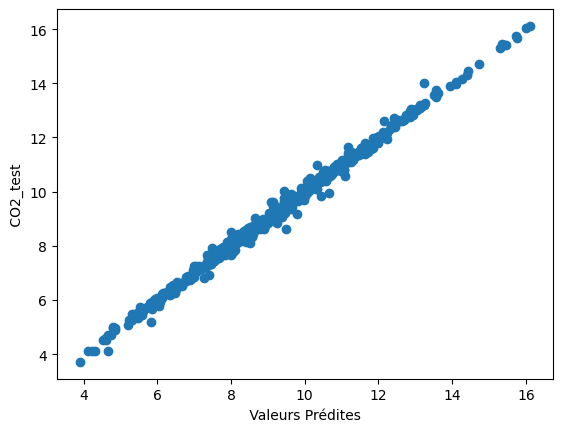

In [96]:
plt.scatter(CO2_pred_boost, CO2_test)
plt.ylabel(" CO2_test ")
plt.xlabel(" Valeurs Prédites ")

### Réseau de neurones

Dans la régression avec réseaux de neurones il faut choisir les paramètres suivant :

- Nombre de couches cachées, cela détermine la profondeur du réseau.
- Nombre de neurones par couche
- Fonction d'activation, nous choisirons la fonction classique pour la régression : la fonction identité.

Choisissons les deux premiers paramètres par validation croisée.

In [72]:
from sklearn.neural_network import MLPRegressor

In [97]:
param_grid = {
    'hidden_layer_sizes': [(3,), (4,), (5,),(6,)],
    'alpha': [1, 2, 3]
}
# ,early_stopping=True
nnet = GridSearchCV(MLPRegressor(max_iter=1000,solver='sgd'), param_grid, cv=10, n_jobs=-1)

# Entraîner le modèle sur les données d'entraînement
nnetOpt = nnet.fit(Xr_train, CO2_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_score = 1. - nnetOpt.best_score_
best_size = nnetOpt.best_params_['hidden_layer_sizes']
best_decay = nnetOpt.best_params_['alpha']

# Entraîner le modèle avec les meilleurs hyperparamètres
best_nnet = MLPRegressor(hidden_layer_sizes=best_size, alpha=best_decay, max_iter=1000)
best_nnetOpt = best_nnet.fit(Xr_train, CO2_train)

print("Meilleur score = %f, Meilleur paramètre couches cahées = %s, meilleur paramètre alpha = %s" % (best_score, best_size, best_decay))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_netwo

Meilleur score = 0.089402, Meilleur paramètre couches cahées = (6,), meilleur paramètre alpha = 2


In [98]:
1-best_nnetOpt.score(Xr_test,CO2_test)

0.07986593342079962

In [99]:
# prévision de l'échantillon test
CO2_pred_nnet = best_nnetOpt.predict(Xr_test)
# matrice de confusion
pred_factor = (CO2_pred_nnet > 10).astype(int)

# Convertir les valeurs réelles en facteur (classes)
true_factor = (CO2_test > 10).astype(int)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(true_factor, pred_factor)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_mat)

Matrice de confusion :
[[321  13]
 [ 25 215]]


Text(0.5, 1.0, ' Résidus du modèle avec Réseau de Neurones ')

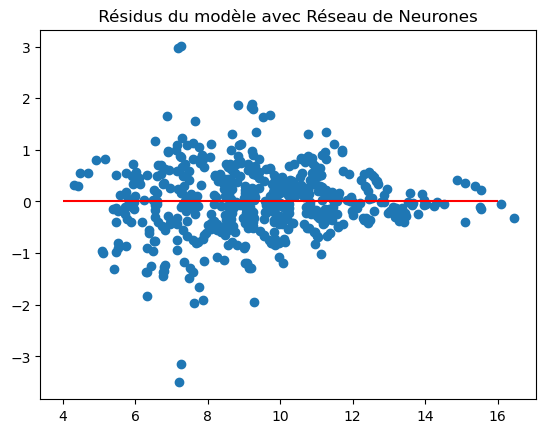

In [100]:
residuals_nnet = CO2_test - CO2_pred_nnet

plt.scatter(CO2_pred_nnet, residuals_nnet)
plt.hlines(0,4,16,color="red")
plt.title(" Résidus du modèle avec Réseau de Neurones ")

In [181]:
mse_nnet = mean_squared_error(CO2_test,CO2_pred_nnet)
R2_nnet = r2_score(CO2_test,CO2_pred_nnet)

print("Erreur de régression : ",mse_nnet)

Erreur de régression :  0.42466935984717424


Text(0.5, 0, ' Valeurs Prédites ')

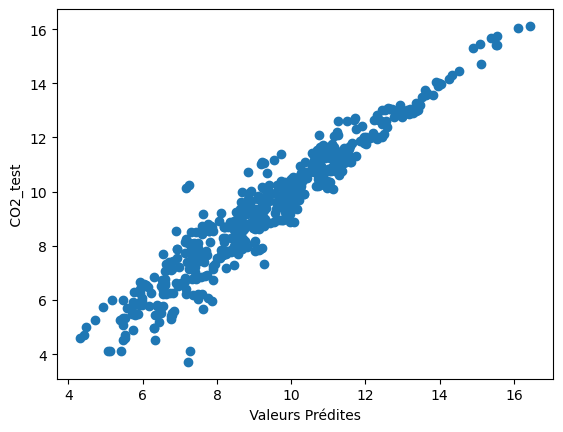

In [102]:
plt.scatter(CO2_pred_nnet, CO2_test)
plt.ylabel(" CO2_test ")
plt.xlabel(" Valeurs Prédites ")

## Comparaison finale de toutes les méthodes de régression

### Comparaison des erreurs de régression

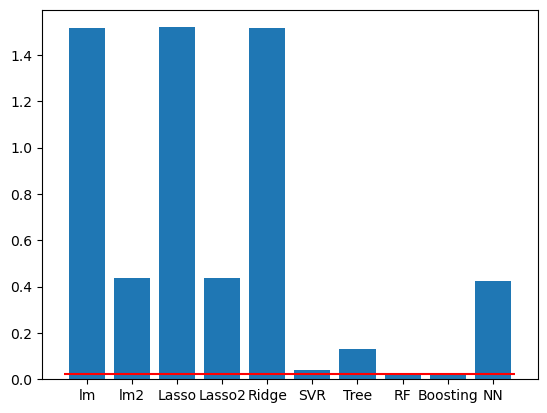

In [183]:
method_names = ["lm","lm2","Lasso","Lasso2", "Ridge","SVR", "Tree", "RF", "Boosting", "NN"]

MSE_fin = [mse_lin, mse_lin2, mse_lasso, mse_lasso2, mse_ridge, mse_svr, mse_arbre, mse_rf, mse_boost, mse_nnet]

plt.bar(method_names, MSE_fin)
plt.hlines(mse_boost,-0.5,9.5,color="red")

**Interprétation :**

Random forest et boosting ont l'erreur de régression la plus faible, suivis de la SVR.

### Affichage de tous les résidus

Text(0.5, 1.0, ' Résidus du modèle de Nnet ')

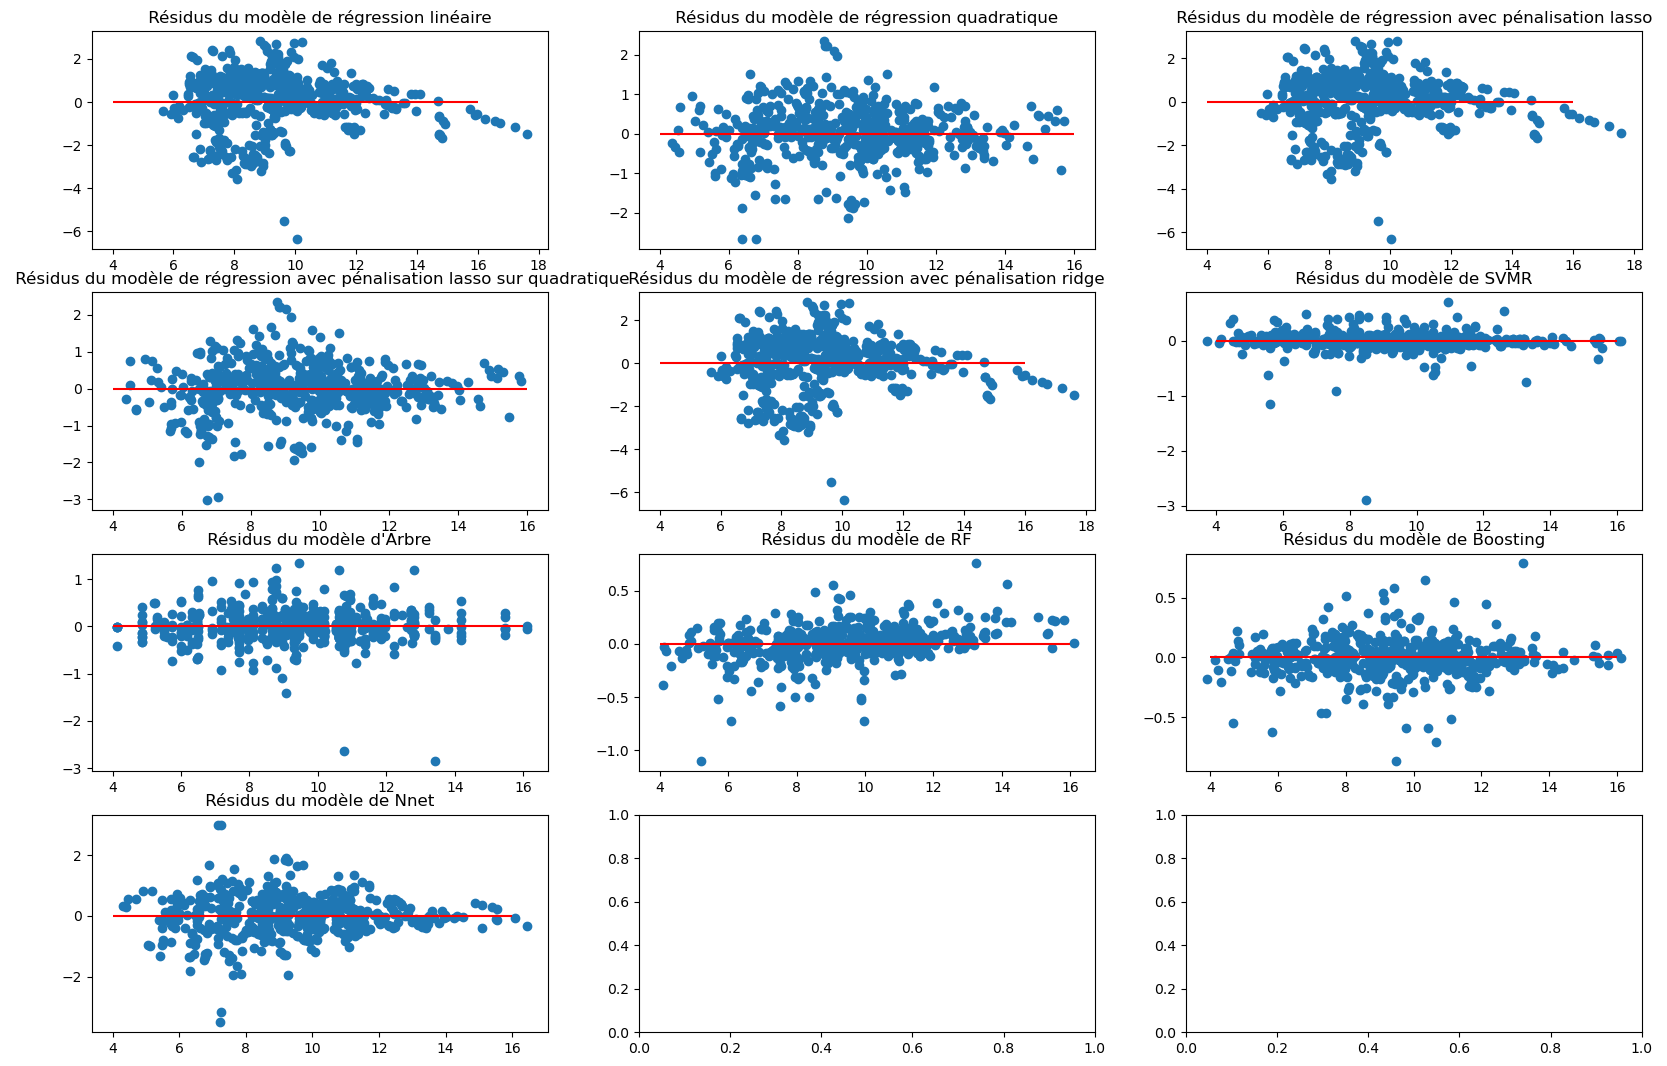

In [105]:
# ----- Comparaison des résidus ----- 
fig ,axs = plt.subplots(4,3, figsize=(20,13))

axs[0,0].scatter(CO2_pred_lin, residuals_lin)
axs[0,0].hlines(0,4,16,color="red")
axs[0,0].set_title(" Résidus du modèle de régression linéaire ")

axs[0,1].scatter(CO2_pred_lin2, residuals_lin_2)
axs[0,1].hlines(0,4,16,color="red")
axs[0,1].set_title(" Résidus du modèle de régression quadratique ")

axs[0,2].scatter(CO2_pred_lasso, residuals_lasso)
axs[0,2].hlines(0,4,16,color="red")
axs[0,2].set_title(" Résidus du modèle de régression avec pénalisation lasso ")

axs[1,0].scatter(CO2_pred_lasso2, residuals_lasso2)
axs[1,0].hlines(0,4,16,color="red")
axs[1,0].set_title(" Résidus du modèle de régression avec pénalisation lasso sur quadratique")

axs[1,1].scatter(CO2_pred_ridge, residuals_ridge)
axs[1,1].hlines(0,4,16,color="red")
axs[1,1].set_title(" Résidus du modèle de régression avec pénalisation ridge ")

axs[1,2].scatter(CO2_pred_svmr, res_svmr)
axs[1,2].hlines(0,4,16,color="red")
axs[1,2].set_title(" Résidus du modèle de SVMR ")

axs[2,0].scatter(CO2_pred_arbre, residuals_arbre)
axs[2,0].hlines(0,4,16,color="red")
axs[2,0].set_title(" Résidus du modèle d'Arbre ")

axs[2,1].scatter(CO2_pred_rf, residuals_rf)
axs[2,1].hlines(0,4,16,color="red")
axs[2,1].set_title(" Résidus du modèle de RF ")

axs[2,2].scatter(CO2_pred_boost, residuals_boost)
axs[2,2].hlines(0,4,16,color="red")
axs[2,2].set_title(" Résidus du modèle de Boosting ")

axs[3,0].scatter(CO2_pred_nnet, residuals_nnet)
axs[3,0].hlines(0,4,16,color="red")
axs[3,0].set_title(" Résidus du modèle de Nnet ")


#### Conclusion

Il semblerait que le meilleur modèle soit celui proposé par Boosting. Il permet de minimiser l'erreur de regression. Ces résidus sont les plus centrés et de variance minimale.

### Interprétation et retour sur l’analyse des données

On a pu monter que les variables importantes de nos méthodes étaient celles qui participaient le plus aux dimensions 1 et 2 de l'ACP. Notament : L_Elec_from_renewables, L_Elec_from_nuclear, Latitude, Low_carbon_elec et L_Land_area sont les variables les plus influentes dans boosting et reviennent également dans les autres méthodes. Ce résultat est cohérent, ces variables sont celles qui influent le plus la valeur du CO2 et l'évolution du jeu de données en général.

De plus l'analyse exploratoire montrait que la latitude d'un pays caractérisait sa production de CO2. Cela revient dans nos modèle qui considèrent cette variable importante.

Ensuite, on a montré que la produciton de CO2 était très corrélée avec L_Elec from_nuclear et L_Elec_from_renewables qui apparaissent bien comme importante pour la prédiction.

## Conclusion

Nous avons montré que le jeu de données initial avait beaucoup de valeurs manquantes. Nous avons enlevé les variables qui avaient trop de ces valeurs car elles n'étaient donc pas exploitables.

Dans un premiers temps nous avons enlevé les individus qui avaient des valeurs manquantes afin d'effectuer une première analyse. On en retire que :

- On peut centrer les données par une transformation logarithmique afin de proposer une meilleure analyse. Il est important de se souvenir que la prédicton que nous faisons est le logarithme de la valeur en CO2.
- Les variables sont toutes dans des unités différentes et sont donc difficilement comparables entre elles à titre quantitatif. Cependant on a pu mettre en avant des interactions entre les variables. Notamment les accès à l'électricité et au fuels agissent de façon similaire à l'approvisionnement en électricité, carburant ... D'autres ont une évolution opposée comme la part d'énergie renouvelable et les accès aux énergies.
- Les variables sont très différentes d'un pays à l'autre, elles présentent des outliers. Notament l'émission de CO2 d'une minorité de pays ont des valeurs extrêmes comparé à une majorité de pays aux valeurs faibles.
- Nous avons pu montrer que l'on pouvait représenter notre jeu de données avec 7 dimensions. Les deux premières représentées notamment par l'accès au fuels et la consomation d'énergie ... L'une évoluant avec les variables produisant de CO2 et l'autre séparant les variables de production d'éléctricité des autres.
- Enfin concernant la variable CO2, nous avons montré qu'elle évolue de façon croissante avec les années. Nous constatons également qu'elle est très différente d'un pays à l'autre. Les pays les plus émetteurs sont principalement dans l'emisphère Nord. Les plus gros emetteurs sont les Etats-Unis, la Chine et l'Inde.

Suite à cette analyse nous avons modélisé notre jeu de données :

- Nous avons mis en place des méthodes de régression linaire sans interaction puis avec. Dans un premier temps sans pénalisation puis avec pénalisation Ridge et sélection de variables par LASSO. Nous observons à chaque fois l'erreur de regression et l'erreur de d'apprentissage.
- Puis nous avons implémenté des méthodes non linéaire SVR, CART, Boosting, Random forest et réseau de neuronnes. Nous vérifions aussi les erreurs obtenues.
- Finalement on a comparé tous les modèles, on retient celui de Boosting qui nous permet d'obtenir les plus petites erreurs avec des résidus centrés. Le niveau de précision du modèle est de 98%. Tout comme l'a montré l'ACP, les varibales les plus influentes dans l'émission de CO2 sont L_Elec_from_renewables, L_Elec_from_nuclear, Latitude, Low_carbon_elec et L_Land_area. Les autres modèles s'appuient aussi sur ces variables.